In [1]:
# !pip install gymnasium

# Importing the necessary libraries

In [2]:
import numpy as np
import gymnasium
from gymnasium import spaces, utils
import os
import math
from operator import add
import matplotlib.pyplot as plt

# Creating the Random Maze Environment encapsulating the `gymansium.Env()` class

In [3]:
#  Creating the class
class RandomMazeEnv(gymnasium.Env):

  metadata = {"render_modes" : ["human", "rgb_array"], "render_fps": 4}
  # Define constants for actions
  LEFT = 0
  DOWN = 3
  RIGHT = 2
  UP = 1

  # setting the directions dict
  directions = {0 : "left", 1 : "up", 2 : "right", 3 : "down"}

  def __init__(self, render = None, seed = None):
      super(RandomMazeEnv, self).__init__()
      p = 0.8 # probability for taking the desired action in a given state
      # Number of discrete actions, we have four: left, down, right, up
      self.grid_size = 3 * 4
      self.action_space = spaces.Discrete(4)
      self.observation_space = spaces.Discrete(12)
      self.P = {
          0: {
              0: [
                  [p + (1-p)/2, 0, -0.04, False],
                  [(1-p)/2, 4, -0.04, False]
              ],
              3: [
                  [(1-p)/2, 0, -0.04, False],
                  [p, 4, -0.04, False],
                  [(1-p)/2, 1, -0.04, False]
              ],
              2: [
                  [(1-p)/2, 4, -0.04, False],
                  [p, 1, -0.04, False],
                  [(1-p)/2, 0, -0.04, False]
              ],
              1: [
                  [(1-p)/2, 1, -0.04, False],
                  [p + (1-p)/2, 0, -0.04, False],
              ]
          },
          1: {
              0: [
                  [(1-p), 1, -0.04, False],
                  [p, 0, -0.04, False],
              ],
              3: [
                  [(1-p)/2, 0, -0.04, False],
                  [p, 1, -0.04, False],
                  [(1-p)/2, 2, -0.04, False]
              ],
              2: [
                  [(1-p), 1, -0.04, False],
                  [p, 2, -0.04, False],
              ],
              1: [
                  [(1-p)/2, 2, -0.04, False],
                  [p, 1, -0.04, False],
                  [(1-p)/2, 0, -0.04, False]
              ]
          },
          2: {
              0: [
                  [(1-p)/2, 2, -0.04, False],
                  [p, 1, -0.04, False],
                  [(1-p)/2, 6, -0.04, False]
              ],
              3: [
                  [(1-p)/2, 1, -0.04, False],
                  [p, 6, -0.04, False],
                  [(1-p)/2, 3, 1.0, True]
              ],
              2: [
                  [(1-p)/2, 6, -0.04, False],
                  [p, 3, 1.0, True],
                  [(1-p)/2, 2, -0.04, False]
              ],
              1: [
                  [(1-p)/2, 3, 1.0, True],
                  [p, 2, -0.04, False],
                  [(1-p)/2, 1, -0.04, False]
              ]
          },
          3: {
              0: [
                  [1.0, 3, 0.0, True]
              ],
              3: [
                  [1.0, 3, 0.0, True]
              ],
              2: [
                  [1.0, 3, 0.0, True]
              ],
              1: [
                  [1.0, 3, 0.0, True]
              ]
          },
          4: {
              0: [
                  [(1-p)/2, 0, -0.04, False],
                  [p, 4, -0.04, False],
                  [(1-p)/2, 8, -0.04, False]
              ],
              3: [
                  [(1-p), 4, -0.04, False],
                  [p, 8, -0.04, False],
              ],
              2: [
                  [(1-p)/2, 8, -0.04, False],
                  [p, 4, -0.04, False],
                  [(1-p)/2, 0, -0.04, False]
              ],
              1: [
                  [(1-p), 4, -0.04, False],
                  [p, 0, -0.04, False],
              ]
          },
          5: {
              0: [
                  [1.0, 5, 0.0, True]
              ],
              3: [
                  [1.0, 5, 0.0, True]
              ],
              2: [
                  [1.0, 5, 0.0, True]
              ],
              1: [
                  [1.0, 5, 0.0, True]
              ]
          },
          6: {
              0: [
                  [(1-p)/2, 2, -0.04, False],
                  [p, 6, -0.04, False],
                  [(1-p)/2, 10, -0.04, False]
              ],
              3: [
                  [(1-p)/2, 6, -0.04, False],
                  [p, 10, -0.04, False],
                  [(1-p)/2, 7, -1.0, True]
              ],
              2: [
                  [(1-p)/2, 10, -0.04, False],
                  [p, 7, -1.0, True],
                  [(1-p)/2, 2, -0.04, False]
              ],
              1: [
                  [(1-p)/2, 7, -1.0, True],
                  [p, 2, -0.04, False],
                  [(1-p)/2, 6, -0.04, False]
              ]
          },
          7: {
              0: [
                  [1.0, 7, 0.0, True]
              ],
              3: [
                  [1.0, 7, 0.0, True]
              ],
              2: [
                  [1.0, 7, 0.0, True]
              ],
              1: [
                  [1.0, 7, 0.0, True]
              ]
          },
          8: {
              0: [
                  [(1-p)/2, 4, -0.04, False],
                  [p + (1-p)/2, 8, -0.04, False]
              ],
              3: [
                  [p + (1-p)/2, 8, -0.04, False],
                  [(1-p)/2, 9, -0.04, False]
              ],
              2: [
                  [(1-p)/2, 8, -0.04, False],
                  [p, 9, -0.04, False],
                  [(1-p)/2, 4, -0.04, False]
              ],
              1: [
                  [(1-p)/2, 9, -0.04, False],
                  [p, 4, -0.04, False],
                  [(1-p)/2, 8, -0.04, False]
              ]
          },
          9: {
              0: [
                  [(1-p), 9, -0.04, False],
                  [p, 8, -0.04, False]
              ],
              3: [
                  [(1-p)/2, 8, -0.04, False],
                  [p, 9, -0.04, False],
                  [(1-p)/2, 10, -0.04, False]
              ],
              2: [
                  [(1-p), 9, -0.04, False],
                  [p, 10, -0.04, False]
              ],
              1: [
                  [(1-p)/2, 10, -0.04, False],
                  [p, 9, -0.04, False],
                  [(1-p)/2, 8, -0.04, False]
              ]
          },
          10: {
              0: [
                  [(1-p)/2, 6, -0.04, False],
                  [p, 9, -0.04, False],
                  [(1-p)/2, 10, -0.04, False]
              ],
              3: [
                  [(1-p)/2, 9, -0.04, False],
                  [p, 10, -0.04, False],
                  [(1-p)/2, 11, -0.04, False]
              ],
              2: [
                  [(1-p)/2, 10, -0.04, False],
                  [p, 11, -0.04, False],
                  [(1-p)/2, 6, -0.04, False]
              ],
              1: [
                  [(1-p)/2, 11, -0.04, False],
                  [p, 6, -0.04, False],
                  [(1-p)/2, 9, -0.04, False]
              ]
          },
          11: {
              0: [
                  [(1-p)/2, 7, -1.0, True],
                  [p, 10, -0.04, False],
                  [(1-p)/2, 11, -0.04, False]
              ],
              3: [
                  [(1-p)/2, 10, -0.04, False],
                  [p + (1-p)/2, 11, -0.04, False]
              ],
              2: [
                  [p + (1-p)/2, 11, -0.04, False],
                  [(1-p)/2, 7, -1.0, True]
              ],
              1: [
                  [(1-p)/2, 11, -0.04, False],
                  [p, 7, -1.0, True],
                  [(1-p)/2, 10, -0.04, False]
              ]
          }
      }
      self.seed(seed)
      self.start_state = 8 # the agent always starts at state 8
      self.state = self.start_state
      self.gamma = 0.99 # discount factor

  def seed(self, seed=None):
      self.np_random, seed = gymnasium.utils.seeding.np_random(seed)
      return [seed]

  def step(self, action):
      transitions = self.P[self.state][action]
      i = self.np_random.choice(len(transitions), p=[t[0] for t in transitions])
      prob, next_state, reward, done = transitions[i]
      # moving to the next state
      self.state = next_state
      return next_state, reward, done, {}

  def reset(self, seed = None):
      self.seed(seed)
      # Reset the state of the environment to an initial state
      self.state = self.start_state
      return self.state

  def close(self):
        pass

# Implementing the `generateTrajectory()` function for the given environment

In [4]:
# Implementing the generateTrajectory function with maxsteps
def generateTrajectory(env, q_values, epsilon, maxSteps, seed=None):
  state = env.reset(seed = seed)
  trajectory = []
  for _ in range(maxSteps):
    if env.np_random.random() < epsilon:  # Exploration
        action = env.np_random.choice(range(q_values.shape[1]))
    else:  # Exploitation
        action = np.argmax(q_values[state])
    next_state, reward, done, _ = env.step(action)
    trajectory.append((state, action, reward, next_state, done))
    state = next_state
    if done:
        break

  return trajectory

# Implementing the `decayAlpha()` function

In [5]:
# Implementing a function for deacaying the step parameter
def decayAlpha(initialValue, finalValue, maxSteps, decayType):

  # storing the step params in a list
  alphas = []

  if decayType == "linear":
   decay_rate = (finalValue - initialValue) / maxSteps
   for curr_step in range(maxSteps):
    curr_alpha = initialValue + decay_rate * curr_step
    alphas.append(curr_alpha)

  elif decayType == "exponential":
    decay_rate = (np.log(finalValue/initialValue)) / maxSteps
    for curr_step in range(maxSteps):
      curr_alpha = initialValue * np.exp(decay_rate * curr_step)
      alphas.append(curr_alpha)

  return alphas

# Implementing the `MonteCarloControl()` function for optimal policy calculation

In [6]:
# implementing the monte carlo control algorithm
def MonteCarloControl(env, gamma, decaytype, maxSteps, numEpisodes, mctype, global_seed = 123):
  q_values = np.zeros((env.observation_space.n, 4))
  alphas = decayAlpha(0.1, 0.01, numEpisodes, decaytype)
  epsilons = decayAlpha(1, 0.01, numEpisodes, decaytype)
  values_eps = []
  q_episodes = np.zeros((numEpisodes, env.observation_space.n, 4))  # Accumulates the state-action values over episodes

  for episode in range(numEpisodes):
      episode_seed = global_seed + episode
      trajectory = generateTrajectory(env, q_values, epsilons[episode], maxSteps, episode_seed)
      if not trajectory:
          continue
      G = 0
      visited_states_actions = set()

      for traj_idx in reversed(range(len(trajectory))):  # Iterate in reversed order
          state, action, reward, next_state, done = trajectory[traj_idx]
          G = gamma * G + reward  # Return calculation
          if (state, action) not in visited_states_actions or mctype == "EVMC":
              q_values[state, action] += alphas[episode] * (G - q_values[state, action])
              visited_states_actions.add((state, action))

      values_eps.append(list(np.max(q_values.copy(), axis = 1)))

      q_episodes[episode] = q_values.copy()

  value_states = np.max(q_values, axis=1)  # Calculates the state value function
  policy = np.argmax(q_values, axis=1)  # Calculates the optimal policy

  return q_values, values_eps, policy, q_episodes

In [7]:
gamma = 0.99
decaytype = "exponential"
maxSteps = 100
numEpisodes = 2000
mctype = "FVMC"
global_seed = 123

env = RandomMazeEnv(seed=global_seed)
q_values, value_states, policy, q_episodes = MonteCarloControl(env, gamma, decaytype, maxSteps, numEpisodes, mctype, global_seed)

# print(values[-1])
print("Printing optimal policy")
print(policy)
print("Optimal policy: " , [env.directions[dir] for dir in policy])
print(value_states[numEpisodes - 1])
print(q_values)

Printing optimal policy
[1 2 2 0 2 0 1 0 2 2 1 0]
Optimal policy:  ['up', 'right', 'right', 'left', 'right', 'left', 'up', 'left', 'right', 'right', 'up', 'left']
[0.8323714150494969, 0.8986177247443078, 0.9546920984498473, 0.0, 0.3361255889265899, 0.0, 0.6719002124056921, 0.0, 0.26836329706390416, 0.514357526595836, 0.5766868342621979, 0.27812269496775144]
[[ 0.41289514  0.83237142  0.78706525  0.10075265]
 [ 0.35436223  0.53371087  0.89861772  0.70723789]
 [ 0.59899507  0.74033249  0.9546921   0.4421146 ]
 [ 0.          0.          0.          0.        ]
 [ 0.04192963  0.3146516   0.33612559 -0.00395793]
 [ 0.          0.          0.          0.        ]
 [ 0.4014429   0.67190021 -0.73670739 -0.23325147]
 [ 0.          0.          0.          0.        ]
 [-0.03231101  0.1655824   0.2683633  -0.00471331]
 [ 0.02821389  0.13709987  0.51435753  0.08596021]
 [ 0.11948369  0.57668683  0.0784095   0.15560938]
 [ 0.27812269 -0.91833783 -0.64770007 -0.36352852]]


# Value estimates vs episodes

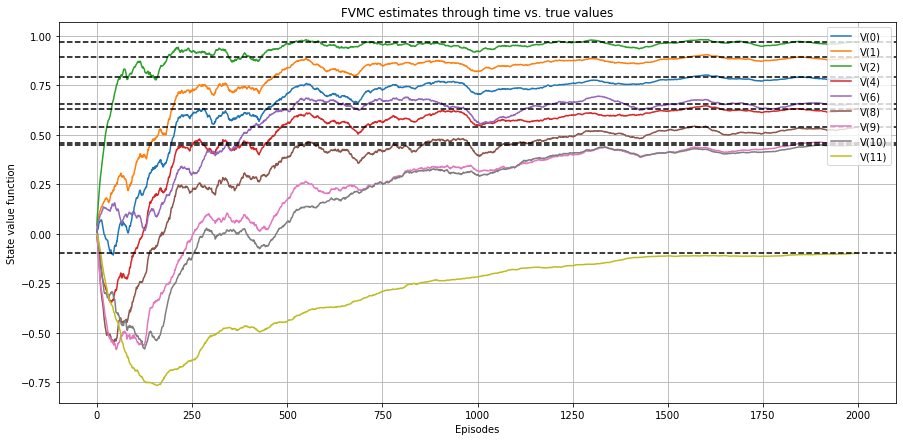

In [8]:
seeds = list(np.arange(100, 150))
numEpisodes = 2000
maxSteps = 100
gamma = 0.99
mctype = "FVMC"
decayType = "exponential"

cumulative_state_values = {s : [0]*numEpisodes for s in range(12) if s not in [3,5,7]}
true_values = [0]*9
# iterating through various seeds (TD)
for seed in seeds:
  global_seed = int(seed)
  q_values, state_values, policy, q_episodes = MonteCarloControl(env, gamma, decaytype, maxSteps, numEpisodes, mctype, global_seed)
  true_values = list(map(add, true_values, [state_values[numEpisodes - 1][i] for i in range(12) if i not in [3, 5, 7]]))
  for state in range(12):
    if state not in [3,5,7]:
      values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]

      # taking the cumulative sum for each state over different seeds
      cumulative_state_values[state] = list(map(add, cumulative_state_values[state], values_per_state))

avg_state_values = {state: [value / len(seeds) for value in values] for state, values in cumulative_state_values.items()}
true_values = [value / len(seeds) for value in true_values]

plt.figure(figsize=(15, 7))

# Plot the estimated values for each state
for state in range(12):  # Loop through non-terminal states
    if state not in [3,5,7]:
      plt.plot(avg_state_values[state], label=f'V({state})')

# Plot the true values for each state as horizontal lines
for state, true_value in enumerate(true_values, start=1):
    plt.axhline(y=true_value, color='k', linestyle='--')

plt.xlabel('Episodes')
plt.ylabel('State value function')
plt.title('FVMC estimates through time vs. true values')
plt.legend(loc = "upper right")
plt.grid()
plt.show()

# Q function estimates vs episodes

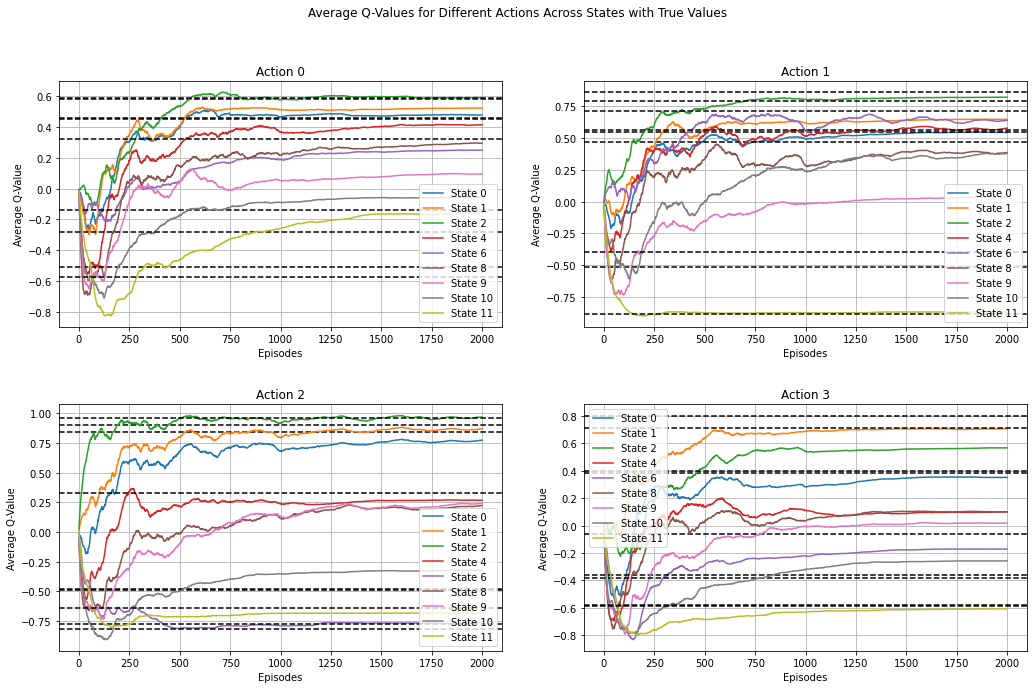

In [9]:
numActions = 4  # Assuming 4 actions
states_to_plot = [0, 1, 2, 4, 6, 8, 9, 10, 11] # non terminal states
seeds = list(np.arange(100, 150))
numEpisodes = 2000
maxSteps = 100
gamma = 0.99
mctype = "FVMC"
decayType = "exponential"

# Initialize cumulative Q-values
cumulative_q_values = {state: {action: [0] * numEpisodes for action in range(numActions)} for state in states_to_plot}

# Iterate over seeds
for seed in seeds:
    global_seed = int(seed)
    _, _, _, q_values = MonteCarloControl(env, gamma, decaytype, maxSteps, numEpisodes, mctype, global_seed)

    for state in states_to_plot:
        for action in range(numActions):
            for episode in range(numEpisodes):
                cumulative_q_values[state][action][episode] += q_values[episode][state][action]

# Calculate average Q-values
avg_q_values = {state: {action: [cumulative_q_values[state][action][episode] / len(seeds) for episode in range(numEpisodes)]
                        for action in range(numActions)} for state in states_to_plot}
true_q_values = {state: {action: q_values[numEpisodes - 1][state][action] for action in range(numActions)} for state in states_to_plot}

# Plotting with true values
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for i, action in enumerate(range(numActions)):
    ax = axes[i // 2, i % 2]
    for state in states_to_plot:
        # Plot average Q-values
        ax.plot(avg_q_values[state][action], label=f'State {state}')
        # Plot true values as horizontal lines
        ax.axhline(y=true_q_values[state][action], color='k', linestyle='--')

    ax.set_title(f'Action {action}')
    ax.set_xlabel('Episodes')
    ax.set_ylabel('Average Q-Value')
    ax.legend()
    ax.grid()

plt.suptitle('Average Q-Values for Different Actions Across States with True Values')
plt.tight_layout(pad=3.0)
plt.show()

# Implementing the SARSA (TD Control) Algorithm

In [10]:
# implementing the SARSA control algorithm
def actionSelect(state, q_values, epsilon, env):
  if env.np_random.random() < epsilon:  # Exploration
      action = env.np_random.choice(range(q_values.shape[1]))
  else:  # Exploitation
      action = np.argmax(q_values[state])
  return action

def sarsaControl(env, gamma, decaytype, maxSteps, numEpisodes, global_seed):
  q_values = np.zeros((env.observation_space.n, env.action_space.n))
  alphas = decayAlpha(0.1, 0.01, numEpisodes, decaytype)
  epsilons = decayAlpha(1, 0.01, numEpisodes, decaytype)
  q_episodes = np.zeros((numEpisodes, env.observation_space.n, env.action_space.n))  # Accumulates the state-action values over episodes
  values_eps = []

  for episode in range(numEpisodes):
    episode_seed = global_seed + episode
    state = env.reset(seed = episode_seed)

    for step in range(maxSteps):
      action = actionSelect(state, q_values, epsilons[episode], env)
      next_state, reward, done, _ = env.step(action)
      next_action = actionSelect(next_state, q_values, epsilons[episode], env) if not done else None
      td_target = reward + (gamma * q_values[next_state, next_action] if not done else 0)
      td_error = td_target - q_values[state, action]
      q_values[state, action] += alphas[episode] * td_error

      state, action = next_state, next_action
      if done:
          break

    q_episodes[episode] = q_values.copy()
    values_eps.append(list(np.max(q_values.copy(), axis = 1)))

  value_states = np.max(q_values, axis=1)  # Calculates the state value function
  policy = np.argmax(q_values, axis=1)  # Calculates the optimal policy

  return q_values, values_eps, policy, q_episodes

In [11]:
gamma = 0.99
decaytype = "exponential"
maxSteps = 100
numEpisodes = 2000
mctype = "FVMC"
global_seed = 123

env = RandomMazeEnv(seed=global_seed)
q_values, state_values, policy, q_episodes = sarsaControl(env, gamma, decaytype, maxSteps, numEpisodes, global_seed)

# print(values[-1])
print("Printing optimal policy")
print(policy)
print("Optimal policy: " , [env.directions[dir] for dir in policy])
print(state_values[numEpisodes - 1])
print(q_values)

Printing optimal policy
[2 2 2 0 1 0 1 0 1 0 1 0]
Optimal policy:  ['right', 'right', 'right', 'left', 'up', 'left', 'up', 'left', 'up', 'left', 'up', 'left']
[0.8045742367559445, 0.8699357543028765, 0.9417443583080484, 0.0, 0.7349279614023697, 0.0, 0.6413920780393298, 0.0, 0.6617152419693325, 0.5498769202384598, 0.20466953217390144, -0.29794673741254885]
[[ 0.61561985  0.60183213  0.80457424  0.47040253]
 [ 0.58999997  0.72234755  0.86993575  0.65546697]
 [ 0.67071375  0.81004244  0.94174436  0.50314711]
 [ 0.          0.          0.          0.        ]
 [ 0.45035455  0.73492796  0.5289454   0.38497849]
 [ 0.          0.          0.          0.        ]
 [ 0.0138463   0.64139208 -0.7822518  -0.15245619]
 [ 0.          0.          0.          0.        ]
 [ 0.35303765  0.66171524  0.21992102  0.34193708]
 [ 0.54987692 -0.16610121 -0.20781314 -0.20447135]
 [-0.37202506  0.20466953 -0.43901194 -0.35394043]
 [-0.29794674 -0.83648032 -0.44013501 -0.41285292]]


# Value estimates vs Episodes

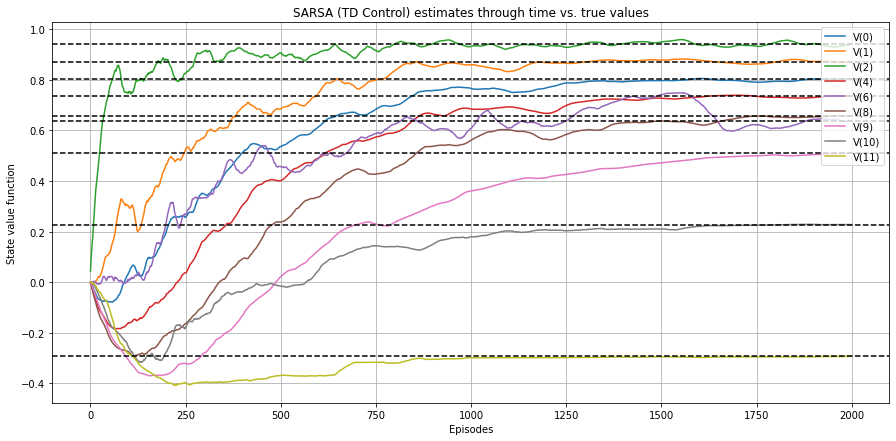

In [12]:
seeds = list(np.arange(100, 150))
numEpisodes = 2000
maxSteps = 100
gamma = 0.99
mctype = "FVMC"
decayType = "exponential"

cumulative_state_values = {s : [0]*numEpisodes for s in range(12) if s not in [3,5,7]}
true_values = [0]*9
# iterating through various seeds (TD)
for seed in seeds:
  global_seed = int(seed)
  q_values, state_values, policy, q_episodes = sarsaControl(env, gamma, decaytype, maxSteps, numEpisodes, global_seed)
  true_values = list(map(add, true_values, [state_values[numEpisodes - 1][i] for i in range(12) if i not in [3, 5, 7]]))
  for state in range(12):
    if state not in [3,5,7]:
      values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]

      # taking the cumulative sum for each state over different seeds
      cumulative_state_values[state] = list(map(add, cumulative_state_values[state], values_per_state))

avg_state_values = {state: [value / len(seeds) for value in values] for state, values in cumulative_state_values.items()}
true_values = [value / len(seeds) for value in true_values]

plt.figure(figsize=(15, 7))

# Plot the estimated values for each state
for state in range(12):  # Loop through non-terminal states
    if state not in [3,5,7]:
      plt.plot(avg_state_values[state], label=f'V({state})')

# Plot the true values for each state as horizontal lines
for state, true_value in enumerate(true_values, start=1):
    plt.axhline(y=true_value, color='k', linestyle='--')

plt.xlabel('Episodes')
plt.ylabel('State value function')
plt.title('SARSA (TD Control) estimates through time vs. true values')
plt.legend(loc = "upper right")
plt.grid()
plt.show()

# Q function estimates vs episodes

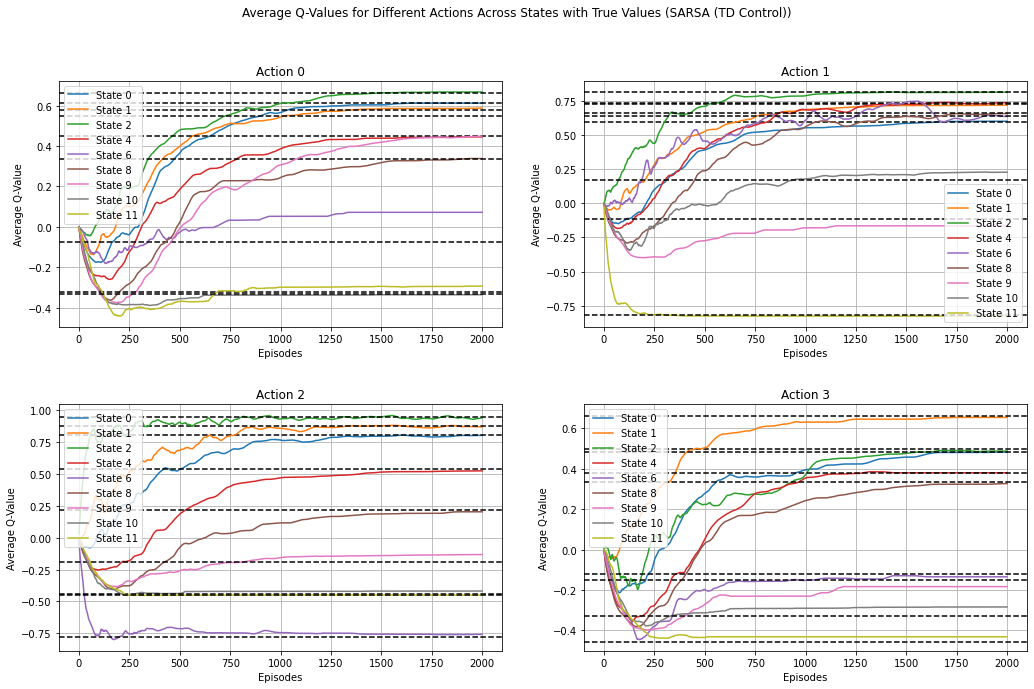

In [13]:
numActions = 4  # Assuming 4 actions
states_to_plot = [0, 1, 2, 4, 6, 8, 9, 10, 11] # non terminal states
seeds = list(np.arange(100, 150))
numEpisodes = 2000
maxSteps = 100
gamma = 0.99
mctype = "FVMC"
decayType = "exponential"

# Initialize cumulative Q-values
cumulative_q_values = {state: {action: [0] * numEpisodes for action in range(numActions)} for state in states_to_plot}

# Iterate over seeds
for seed in seeds:
    global_seed = int(seed)
    _, _, _, q_values = sarsaControl(env, gamma, decaytype, maxSteps, numEpisodes, global_seed)

    for state in states_to_plot:
        for action in range(numActions):
            for episode in range(numEpisodes):
                cumulative_q_values[state][action][episode] += q_values[episode][state][action]

# Calculate average Q-values
avg_q_values = {state: {action: [cumulative_q_values[state][action][episode] / len(seeds) for episode in range(numEpisodes)]
                        for action in range(numActions)} for state in states_to_plot}
true_q_values = {state: {action: q_values[numEpisodes - 1][state][action] for action in range(numActions)} for state in states_to_plot}

# Plotting with true values
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for i, action in enumerate(range(numActions)):
    ax = axes[i // 2, i % 2]
    for state in states_to_plot:
        # Plot average Q-values
        ax.plot(avg_q_values[state][action], label=f'State {state}')
        # Plot true values as horizontal lines
        ax.axhline(y=true_q_values[state][action], color='k', linestyle='--')

    ax.set_title(f'Action {action}')
    ax.set_xlabel('Episodes')
    ax.set_ylabel('Average Q-Value')
    ax.legend()
    ax.grid()

plt.suptitle('Average Q-Values for Different Actions Across States with True Values (SARSA (TD Control))')
plt.tight_layout(pad=3.0)
plt.show()

# Implmenting the Q learning algorithm

In [14]:
# Implementing the Q learning algorithm
def Qlearning(env, gamma, decaytype, maxSteps, numEpisodes, global_seed):
  q_values = np.zeros((env.observation_space.n, 4))
  q_episodes = np.zeros((numEpisodes, env.observation_space.n, 4))
  values_eps = []
  alphas = decayAlpha(0.1, 0.01, numEpisodes, decaytype)
  epsilons = decayAlpha(1, 0.01, numEpisodes, decaytype)

  # iterating through the episodes
  for episode in range(numEpisodes):
    episode_seed = global_seed + episode
    state = env.reset(seed = episode_seed)

    # iterating through the experiences in each episode
    for step in range(maxSteps):
      action = actionSelect(state, q_values, epsilons[episode], env)
      next_state, reward, done, _ = env.step(action)
      td_target = reward + (gamma * np.max(q_values[next_state]) if not done else 0) # calculates the optimal action
      td_error = td_target - q_values[state, action]
      q_values[state, action] += alphas[episode] * td_error
      state = next_state

      if done:
        break

    q_episodes[episode] = q_values.copy()
    values_eps.append(list(np.max(q_values.copy(), axis = 1)))

  value_states = np.max(q_values, axis=1)  # Calculates the state value function
  policy = np.argmax(q_values, axis=1)  # Calculates the optimal policy

  return q_values, values_eps, policy, q_episodes

In [15]:
gamma = 0.99
decaytype = "exponential"
maxSteps = 100
numEpisodes = 2000
mctype = "FVMC"
global_seed = 123

env = RandomMazeEnv(seed=global_seed)
q_values, state_values, policy, q_episodes = Qlearning(env, gamma, decaytype, maxSteps, numEpisodes, global_seed)

# print(values[-1])
print("Printing optimal policy")
print(policy)
print("Optimal policy: " , [env.directions[dir] for dir in policy])
print(state_values[numEpisodes - 1])
print(q_values)

Printing optimal policy
[2 2 2 0 1 0 0 0 1 0 1 0]
Optimal policy:  ['right', 'right', 'right', 'left', 'up', 'left', 'left', 'left', 'up', 'left', 'up', 'left']
[0.8248028663373717, 0.8912294172509734, 0.9590984477659523, 0.0, 0.765223099339217, 0.0, 0.5853958366114441, 0.0, 0.7005211641426643, 0.6385555231695659, 0.5804605808929155, 0.1603866181397091]
[[ 0.77638207  0.78732122  0.82480287  0.74274789]
 [ 0.7979173   0.85163039  0.89122942  0.85276308]
 [ 0.84137269  0.91547971  0.95909845  0.7265337 ]
 [ 0.          0.          0.          0.        ]
 [ 0.72477343  0.7652231   0.71988315  0.66243464]
 [ 0.          0.          0.          0.        ]
 [ 0.58539584  0.56488989 -0.73685937  0.1971874 ]
 [ 0.          0.          0.          0.        ]
 [ 0.663925    0.70052116  0.61585905  0.65073859]
 [ 0.63855552  0.55476019  0.47806729  0.49939963]
 [ 0.38556208  0.58046058  0.06391397  0.31231028]
 [ 0.16038662 -0.88372393 -0.08937531 -0.10833657]]


# Value estimates vs Episodes

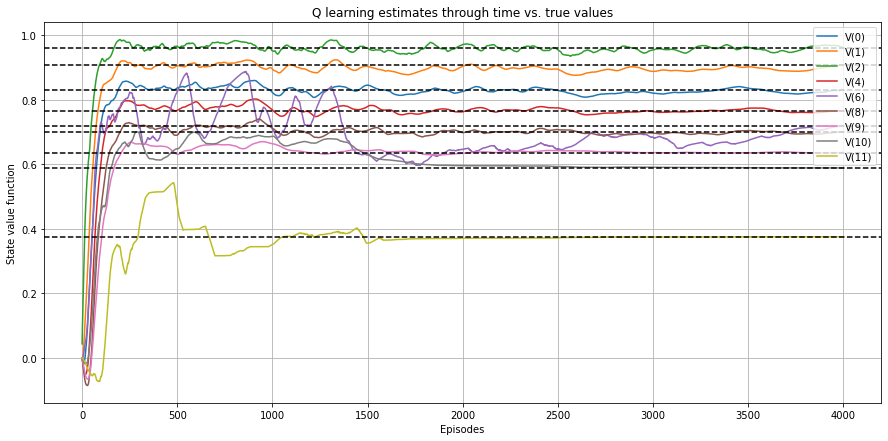

In [16]:
seeds = list(np.arange(100, 150))
numEpisodes = 4000
maxSteps = 100
gamma = 0.99
mctype = "FVMC"
decayType = "exponential"

cumulative_state_values = {s : [0]*numEpisodes for s in range(12) if s not in [3,5,7]}
true_values = [0]*9
# iterating through various seeds (TD)
for seed in seeds:
  global_seed = int(seed)
  q_values, state_values, policy, q_episodes = Qlearning(env, gamma, decaytype, maxSteps, numEpisodes, global_seed)
  true_values = list(map(add, true_values, [state_values[numEpisodes - 1][i] for i in range(12) if i not in [3, 5, 7]]))
  for state in range(12):
    if state not in [3,5,7]:
      values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]

      # taking the cumulative sum for each state over different seeds
      cumulative_state_values[state] = list(map(add, cumulative_state_values[state], values_per_state))

avg_state_values = {state: [value / len(seeds) for value in values] for state, values in cumulative_state_values.items()}
true_values = [value / len(seeds) for value in true_values]

plt.figure(figsize=(15, 7))

# Plot the estimated values for each state
for state in range(12):  # Loop through non-terminal states
    if state not in [3,5,7]:
      plt.plot(avg_state_values[state], label=f'V({state})')

# Plot the true values for each state as horizontal lines
for state, true_value in enumerate(true_values, start=1):
    plt.axhline(y=true_value, color='k', linestyle='--')

plt.xlabel('Episodes')
plt.ylabel('State value function')
plt.title('Q learning estimates through time vs. true values')
plt.legend(loc = "upper right")
plt.grid()
plt.show()

# Q function estimates vs Episodes

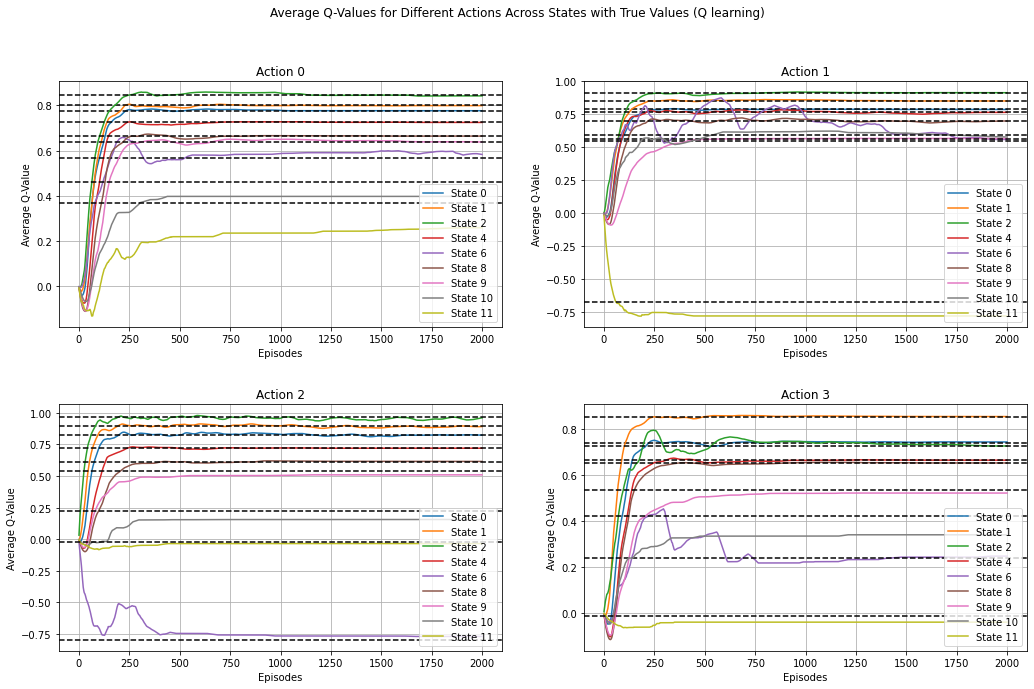

In [17]:
numActions = 4  # Assuming 4 actions
states_to_plot = [0, 1, 2, 4, 6, 8, 9, 10, 11] # non terminal states
seeds = list(np.arange(100, 150))
numEpisodes = 2000
maxSteps = 100
gamma = 0.99
mctype = "FVMC"
decayType = "exponential"

# Initialize cumulative Q-values
cumulative_q_values = {state: {action: [0] * numEpisodes for action in range(numActions)} for state in states_to_plot}

# Iterate over seeds
for seed in seeds:
    global_seed = int(seed)
    _, _, _, q_values = Qlearning(env, gamma, decaytype, maxSteps, numEpisodes, global_seed)

    for state in states_to_plot:
        for action in range(numActions):
            for episode in range(numEpisodes):
                cumulative_q_values[state][action][episode] += q_values[episode][state][action]

# Calculate average Q-values
avg_q_values = {state: {action: [cumulative_q_values[state][action][episode] / len(seeds) for episode in range(numEpisodes)]
                        for action in range(numActions)} for state in states_to_plot}
true_q_values = {state: {action: q_values[numEpisodes - 1][state][action] for action in range(numActions)} for state in states_to_plot}

# Plotting with true values
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for i, action in enumerate(range(numActions)):
    ax = axes[i // 2, i % 2]
    for state in states_to_plot:
        # Plot average Q-values
        ax.plot(avg_q_values[state][action], label=f'State {state}')
        # Plot true values as horizontal lines
        ax.axhline(y=true_q_values[state][action], color='k', linestyle='--')

    ax.set_title(f'Action {action}')
    ax.set_xlabel('Episodes')
    ax.set_ylabel('Average Q-Value')
    ax.legend()
    ax.grid()

plt.suptitle('Average Q-Values for Different Actions Across States with True Values (Q learning)')
plt.tight_layout(pad=3.0)
plt.show()

# Implementing the double Q learning algorithm

In [18]:
# Implementing the double Q Learning algorithm
def doubleQlearning(env, gamma, decayType, maxSteps, numEpisodes, global_seed):
  q1_values = np.zeros((env.observation_space.n, 4))
  q2_values = np.zeros((env.observation_space.n, 4))
  q1_episodes = np.zeros((numEpisodes, env.observation_space.n, 4))
  q2_episodes = np.zeros((numEpisodes, env.observation_space.n, 4))
  alphas = decayAlpha(0.1, 0.01, numEpisodes, decayType)
  epsilons = decayAlpha(1, 0.01, numEpisodes, decayType)
  values_eps = []

  for episode in range(numEpisodes):
    episode_seed = global_seed + episode
    state = env.reset(seed = episode_seed)

    for step in range(maxSteps):
      action = actionSelect(state, q1_values + q2_values, epsilons[episode], env)
      next_state, reward, done, _ = env.step(action)

      if env.np_random.random() < 0.5:
          # Update q1
          action_q1 = np.argmax(q1_values[next_state])
          td_target = reward + gamma * q2_values[next_state, action_q1] if not done else reward
          td_error = td_target - q1_values[state, action]
          q1_values[state, action] += alphas[episode] * td_error
      else:
          # Update q2
          action_q2 = np.argmax(q2_values[next_state])
          td_target = reward + gamma * q1_values[next_state, action_q2] if not done else reward
          td_error = td_target - q2_values[state, action]
          q2_values[state, action] += alphas[episode] * td_error

      state = next_state
      if done:
          break

    # Store the Q-values at the end of each episode
    q1_episodes[episode] = q1_values.copy()
    q2_episodes[episode] = q2_values.copy()
    values_eps.append(np.max((q1_values + q2_values) / 2, axis=1))

  # Calculate final policy and values after all episodes
  q_values = (q1_values + q2_values) / 2
  value_states = np.max(q_values, axis=1)
  policy = np.argmax(q_values, axis=1)
  q_episodes = (q1_episodes + q2_episodes) / 2

  return q_values, values_eps, policy, q_episodes

In [19]:
gamma = 0.99
decaytype = "exponential"
maxSteps = 100
numEpisodes = 2000
mctype = "FVMC"
global_seed = 123

env = RandomMazeEnv(seed=global_seed)
q_values, state_values, policy, q_episodes = doubleQlearning(env, gamma, decaytype, maxSteps, numEpisodes, global_seed)

# print(values[-1])
print("Printing optimal policy")
print(policy)
print("Optimal policy: " , [env.directions[dir] for dir in policy])
print(state_values[numEpisodes - 1])
print(q_values)

Printing optimal policy
[2 2 2 0 1 0 1 0 1 2 1 0]
Optimal policy:  ['right', 'right', 'right', 'left', 'up', 'left', 'up', 'left', 'up', 'right', 'up', 'left']
[0.81822562 0.87940829 0.94003949 0.         0.75589938 0.
 0.64962408 0.         0.67258319 0.47120656 0.51587392 0.08709683]
[[ 0.74547281  0.74525846  0.81822562  0.70808953]
 [ 0.75647354  0.82500263  0.87940829  0.81881357]
 [ 0.80960615  0.9007469   0.94003949  0.66025885]
 [ 0.          0.          0.          0.        ]
 [ 0.69071471  0.75589938  0.67732091  0.61990391]
 [ 0.          0.          0.          0.        ]
 [ 0.53506405  0.64962408 -0.64798202  0.01280296]
 [ 0.          0.          0.          0.        ]
 [ 0.60282274  0.67258319  0.42400891  0.55577178]
 [ 0.26761434  0.2577014   0.47120656  0.20266825]
 [ 0.14303944  0.51587392 -0.0655555   0.2251349 ]
 [ 0.08709683 -0.72224211 -0.11560957 -0.08314578]]


# Value estimates vs Episodes

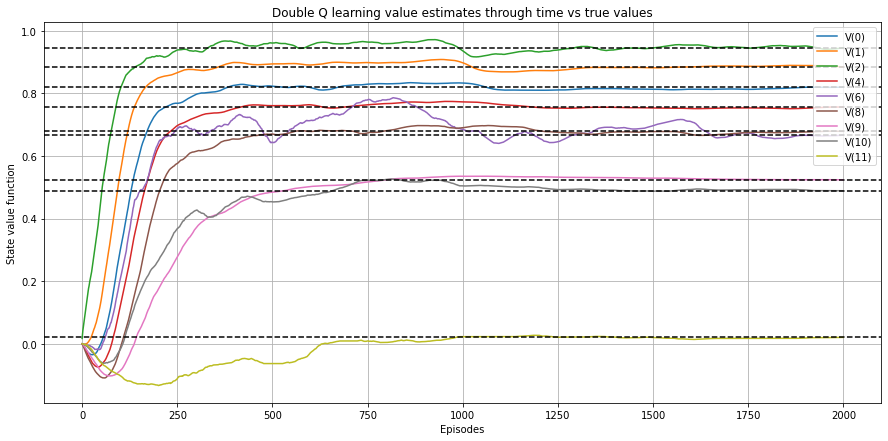

In [21]:
seeds = list(np.arange(100, 150))
numEpisodes = 2000
maxSteps = 100
gamma = 0.99
mctype = "FVMC"
decayType = "exponential"

cumulative_state_values = {s : [0]*numEpisodes for s in range(12) if s not in [3,5,7]}
true_values = [0]*9
# iterating through various seeds (TD)
for seed in seeds:
  global_seed = int(seed)
  q_values, state_values, policy, q_episodes = doubleQlearning(env, gamma, decaytype, maxSteps, numEpisodes, global_seed)
  true_values = list(map(add, true_values, [state_values[numEpisodes - 1][i] for i in range(12) if i not in [3, 5, 7]]))
  for state in range(12):
    if state not in [3,5,7]:
      values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]

      # taking the cumulative sum for each state over different seeds
      cumulative_state_values[state] = list(map(add, cumulative_state_values[state], values_per_state))

avg_state_values = {state: [value / len(seeds) for value in values] for state, values in cumulative_state_values.items()}
true_values = [value / len(seeds) for value in true_values]

plt.figure(figsize=(15, 7))

# Plot the estimated values for each state
for state in range(12):  # Loop through non-terminal states
    if state not in [3,5,7]:
      plt.plot(avg_state_values[state], label=f'V({state})')

# Plot the true values for each state as horizontal lines
for state, true_value in enumerate(true_values, start=1):
    plt.axhline(y=true_value, color='k', linestyle='--')

plt.xlabel('Episodes')
plt.ylabel('State value function')
plt.title('Double Q learning value estimates through time vs true values')
plt.legend(loc = "upper right")
plt.grid()
plt.show()

# Q function estimates vs Episodes

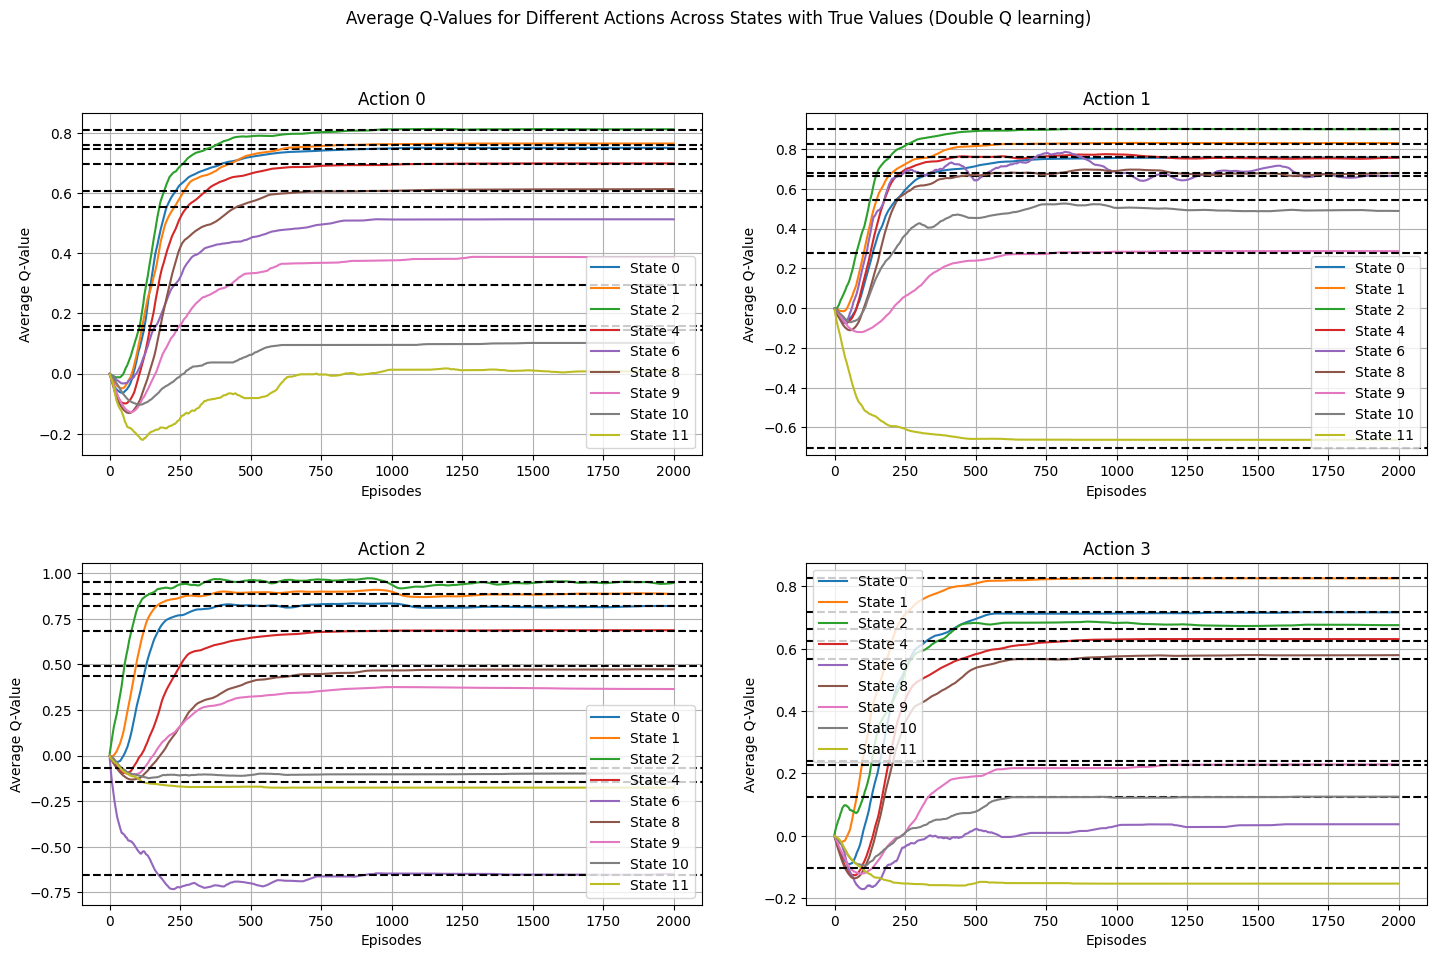

In [ ]:
numActions = 4  # Assuming 4 actions
states_to_plot = [0, 1, 2, 4, 6, 8, 9, 10, 11] # non terminal states
seeds = list(np.arange(100, 150))
numEpisodes = 2000
maxSteps = 100
gamma = 0.99
mctype = "FVMC"
decayType = "exponential"

# Initialize cumulative Q-values
cumulative_q_values = {state: {action: [0] * numEpisodes for action in range(numActions)} for state in states_to_plot}

# Iterate over seeds
for seed in seeds:
    global_seed = int(seed)
    _, _, _, q_values = doubleQlearning(env, gamma, decaytype, maxSteps, numEpisodes, global_seed)

    for state in states_to_plot:
        for action in range(numActions):
            for episode in range(numEpisodes):
                cumulative_q_values[state][action][episode] += q_values[episode][state][action]

# Calculate average Q-values
avg_q_values = {state: {action: [cumulative_q_values[state][action][episode] / len(seeds) for episode in range(numEpisodes)]
                        for action in range(numActions)} for state in states_to_plot}
true_q_values = {state: {action: q_values[numEpisodes - 1][state][action] for action in range(numActions)} for state in states_to_plot}

# Plotting with true values
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for i, action in enumerate(range(numActions)):
    ax = axes[i // 2, i % 2]
    for state in states_to_plot:
        # Plot average Q-values
        ax.plot(avg_q_values[state][action], label=f'State {state}')
        # Plot true values as horizontal lines
        ax.axhline(y=true_q_values[state][action], color='k', linestyle='--')

    ax.set_title(f'Action {action}')
    ax.set_xlabel('Episodes')
    ax.set_ylabel('Average Q-Value')
    ax.legend()
    ax.grid()

plt.suptitle('Average Q-Values for Different Actions Across States with True Values (Double Q learning)')
plt.tight_layout(pad=3.0)
plt.show()

# Comparing between different control algorithms

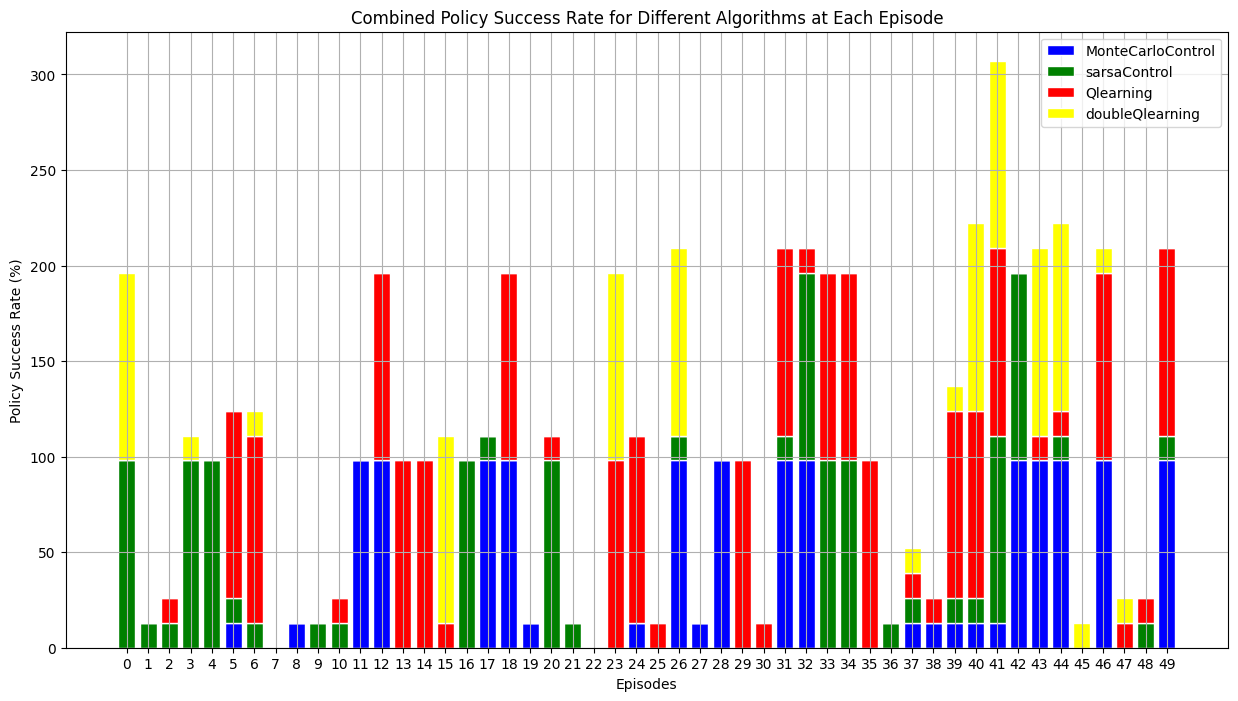

In [ ]:
numActions = 4  # Assuming 4 actions
states_to_plot = [0, 1, 2, 4, 6, 8, 9, 10, 11] # non terminal states
seeds = list(np.arange(100, 150))
numEpisodes = 50
maxSteps = 100
gamma = 0.99
mctype = "FVMC"
decayType = "exponential"


# implemeting the policy success rate calculation for all control algorithms
def getPolicySuccessRate(env, curr_policy, goalState, maxEpisodes=100, maxSteps=200, global_seed=123):
    success_count = 0
    for episode in range(maxEpisodes):
      episode_seed = global_seed + episode
      state = env.reset(seed=episode_seed)

      for _ in range(maxSteps):
        action = curr_policy[state]
        next_state, reward, done, _ = env.step(action)
        if next_state == goalState:
          success_count += 1
          break
        if done:
          break
      state = next_state  # Update the state for the next iteration

    return (success_count / maxEpisodes) * 100

goalState = 3 # defining the goal state

# runnning it for different algorithms
policy_success_rates = {'MonteCarloControl': [], 'sarsaControl' : [], 'Qlearning' : [], 'doubleQlearning' : []}
algorithms = [MonteCarloControl, sarsaControl, Qlearning, doubleQlearning]


# running the algorithms

for episode in range(numEpisodes):
  episode_seed = global_seed + episode

  # Monte Carlo Control
  q_values_mc, _, policy_mc, _ = MonteCarloControl(env, gamma, decayType, maxSteps, episode + 1, mctype, global_seed)
  success_rate_mc = getPolicySuccessRate(env, policy_mc, goalState, maxEpisodes=100, maxSteps=200, global_seed=123)
  policy_success_rates['MonteCarloControl'].append(success_rate_mc)

  # SARSA Control
  q_values_sarsa, _, policy_sarsa, _ = sarsaControl(env, gamma, decayType, maxSteps, episode + 1, global_seed)
  success_rate_sarsa = getPolicySuccessRate(env, policy_sarsa, goalState, maxEpisodes=100, maxSteps=200, global_seed=123)
  policy_success_rates['sarsaControl'].append(success_rate_sarsa)

  # Q-Learning
  q_values_q, _, policy_q, _ = Qlearning(env, gamma, decayType, maxSteps, episode + 1, global_seed)
  success_rate_q = getPolicySuccessRate(env, policy_q, goalState, maxEpisodes=100, maxSteps=200, global_seed=123)
  policy_success_rates['Qlearning'].append(success_rate_q)

  # Double Q-Learning
  q_values_doubleq, _, policy_doubleq, _ = doubleQlearning(env, gamma, decayType, maxSteps, episode + 1, global_seed)
  success_rate_doubleq = getPolicySuccessRate(env, policy_doubleq, goalState, maxEpisodes=100, maxSteps=200, global_seed=123)
  policy_success_rates['doubleQlearning'].append(success_rate_doubleq)

# Plotting
# colors = ['blue', 'green', 'red', 'yellow']
# algorithms = list(policy_success_rates.keys())

# plt.figure(figsize=(15, 8))

# bottom_values = np.zeros(numEpisodes)

# # Stack bars for each algorithm
# for i, algorithm in enumerate(algorithms):
#     plt.bar(range(numEpisodes), policy_success_rates[algorithm], bottom=bottom_values, color=colors[i], edgecolor='white', label=algorithm)
#     bottom_values += np.array(policy_success_rates[algorithm])

# plt.xlabel('Episodes')
# plt.ylabel('Policy Success Rate (%)')
# plt.title('Combined Policy Success Rate for Different Algorithms at Each Episode')
# plt.xticks(range(numEpisodes))
# plt.legend()
# plt.grid()
# plt.show()

num_algorithms = len(policy_success_rates)
bar_width = 0.15  # Width of the bars
index = np.arange(numEpisodes)  # Array with the number of episodes

plt.figure(figsize=(15, 8))

# Create bars for each algorithm at each episode
for i, (algorithm, rates) in enumerate(policy_success_rates.items()):
    plt.bar(index + i * bar_width, rates, bar_width, label=algorithm)

plt.xlabel('Episodes')
plt.ylabel('Policy Success Rate (%)')
plt.title('Policy Success Rate for Different Algorithms at Each Episode')
plt.xticks(index + bar_width * (num_algorithms / 2), range(numEpisodes))
plt.legend()
plt.grid()
plt.show()

# Expected Return from Start state vs Episodes for all algorithms

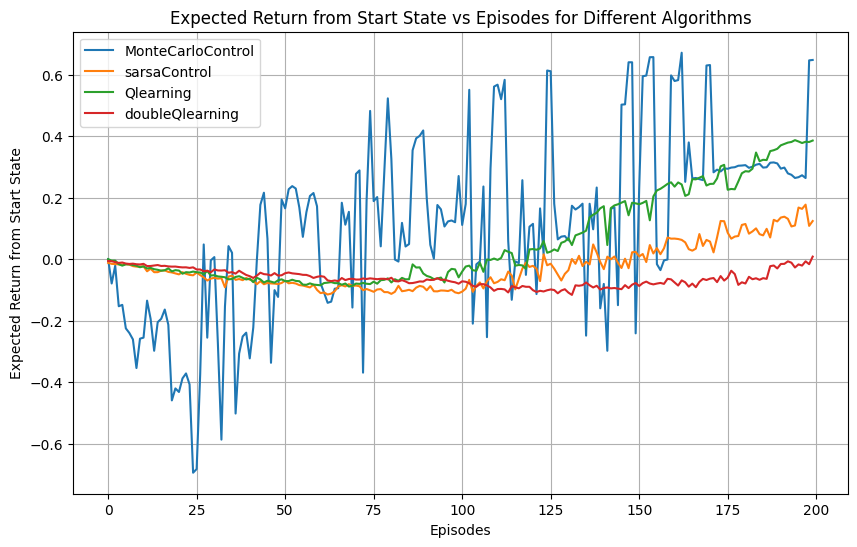

In [ ]:
start_state = 8
numEpisodes = 200

expected_return = {
    'MonteCarloControl': [],
    'sarsaControl': [],
    'Qlearning': [],
    'doubleQlearning': []
}

for episode in range(numEpisodes):
  episode_seed = global_seed + episode

  # Monte Carlo Control
  q_values_mc, _, policy_mc, _ = MonteCarloControl(env, gamma, decaytype, maxSteps, episode + 1, mctype, global_seed)
  best_action_mc = np.argmax(q_values_mc[start_state])
  expected_return['MonteCarloControl'].append(q_values_mc[start_state, best_action_mc])

  # SARSA Control
  q_values_sarsa, _, policy_sarsa, _ = sarsaControl(env, gamma, decaytype, maxSteps, episode + 1, global_seed)
  best_action_sarsa = np.argmax(q_values_sarsa[start_state])
  expected_return['sarsaControl'].append(q_values_sarsa[start_state, best_action_sarsa])

  # Q-Learning
  q_values_q, _, policy_q, _ = Qlearning(env, gamma, decaytype, maxSteps, episode + 1, global_seed)
  best_action_q = np.argmax(q_values_q[start_state])
  expected_return['Qlearning'].append(q_values_q[start_state, best_action_q])

  # Double Q-Learning
  q_values_doubleq, _, policy_doubleq, _ = doubleQlearning(env, gamma, decaytype, maxSteps, episode + 1, global_seed)
  best_action_doubleq = np.argmax(q_values_doubleq[start_state])
  expected_return['doubleQlearning'].append(q_values_doubleq[start_state, best_action_doubleq])

# Plotting
plt.figure(figsize=(10, 6))
for algorithm_name, returns in expected_return.items():
  plt.plot(returns, label=algorithm_name)

plt.xlabel('Episodes')
plt.ylabel('Expected Return from Start State')
plt.title('Expected Return from Start State vs Episodes for Different Algorithms')
plt.legend()
plt.grid()
plt.show()

# State-Value Estimation error vs Episodes for all algorithms

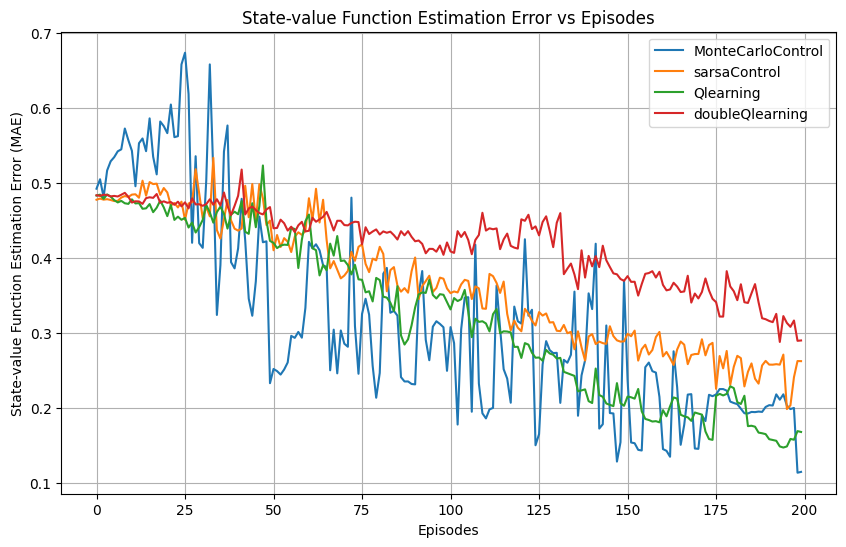

In [ ]:
# optimal values for all states
numEpisodes = 200
optimal_v = [0.81822562, 0.87940829, 0.94003949, 0, 0.75589938, 0, 0.64962408, 0, 0.67258319, 0.47120656, 0.51587392, 0.08709683]
estimation_error = {
    'MonteCarloControl': [],
    'sarsaControl': [],
    'Qlearning': [],
    'doubleQlearning': []
}

for episode in range(numEpisodes):
  q_values_mc, _, policy_mc, _ = MonteCarloControl(env, gamma, decayType, maxSteps, episode + 1, mctype, global_seed)
  v_mc = np.max(q_values_mc, axis=1)
  mae_mc = np.mean(np.abs(v_mc - optimal_v))
  estimation_error['MonteCarloControl'].append(mae_mc)

  # SARSA Control
  q_values_sarsa, _, policy_sarsa, _ = sarsaControl(env, gamma, decayType, maxSteps, episode + 1, global_seed)
  v_sarsa = np.max(q_values_sarsa, axis=1)
  mae_sarsa = np.mean(np.abs(v_sarsa - optimal_v))
  estimation_error['sarsaControl'].append(mae_sarsa)

  # Q-Learning
  q_values_q, _, policy_q, _ = Qlearning(env, gamma, decayType, maxSteps, episode + 1, global_seed)
  v_q = np.max(q_values_q, axis=1)
  mae_q = np.mean(np.abs(v_q - optimal_v))
  estimation_error['Qlearning'].append(mae_q)

  # Double Q-Learning
  q_values_doubleq, _, policy_doubleq, _ = doubleQlearning(env, gamma, decayType, maxSteps, episode + 1, global_seed)
  v_doubleq = np.max(q_values_doubleq, axis=1)
  mae_doubleq = np.mean(np.abs(v_doubleq - optimal_v))
  estimation_error['doubleQlearning'].append(mae_doubleq)

# Plotting
plt.figure(figsize=(10, 6))
for algorithm_name, errors in estimation_error.items():
    plt.plot(errors, label=algorithm_name)

plt.xlabel('Episodes')
plt.ylabel('State-value Function Estimation Error (MAE)')
plt.title('State-value Function Estimation Error vs Episodes')
plt.legend()
plt.grid()
plt.show()

# Implementing the SARSA (λ) algorithm with replacing Eligibility Traces

In [ ]:
# Implementing the SARSA with replacing traces
def actionSelect(state, q_values, epsilon, env):
  if env.np_random.random() < epsilon:  # Exploration
      action = env.np_random.choice(range(q_values.shape[1]))
  else:  # Exploitation
      action = np.argmax(q_values[state])
  return action

def replacingSARSA(env, gamma, trace_decay, decaytype, maxSteps, numEpisodes, global_seed, replaceTrace):
  q_values = np.zeros((env.observation_space.n, 4))
  q_episodes = np.zeros((numEpisodes, env.observation_space.n, 4))
  values_eps = []
  alphas = decayAlpha(0.1, 0.01, numEpisodes, decaytype)
  epsilons = decayAlpha(1, 0.01, numEpisodes, decaytype)
  traces = np.zeros((env.observation_space.n, 4)) # stores the visited states : eligibility traces
  # iterating over the episodes
  for episode in range(numEpisodes):
    episode_seed = global_seed + episode
    state = env.reset(seed = episode_seed)

    for step in range(maxSteps):
      action = actionSelect(state, q_values, epsilons[episode], env)
      next_state, reward, done, _ = env.step(action)
      next_action = actionSelect(next_state, q_values, epsilons[episode], env)
      td_target = reward + (gamma * q_values[next_state, next_action]) if not done else reward
      td_error = td_target - q_values[state, action]

      # stores the count of visited state-action pairs for learning long term consequences of actions
      traces[state, action] += 1

      # resets the trace in case of replacing traces
      if replaceTrace == True:
        traces = np.clip(traces, 0, 1)

      q_values[state, action] += alphas[episode] * td_error * traces[state, action]
      traces[state, action] = gamma * trace_decay * traces[state, action]
      state, action = next_state, next_action

      if done:
        break

    q_episodes[episode] = q_values.copy()
    values_eps.append(list(np.max(q_values.copy(), axis = 1)))

  value_states = np.max(q_values, axis=1)  # Calculates the state value function
  policy = np.argmax(q_values, axis=1)  # Calculates the optimal policy

  return q_values, values_eps, policy, q_episodes

In [ ]:
gamma = 0.99
decaytype = "exponential"
maxSteps = 100
numEpisodes = 2000
mctype = "FVMC"
global_seed = 123
trace_decay = 0.3

env = RandomMazeEnv(seed=global_seed)
q_values, state_values, policy, q_episodes = replacingSARSA(env, gamma, trace_decay, decaytype, maxSteps, numEpisodes, global_seed, replaceTrace = True)

# print(values[-1])
print("Printing optimal policy")
print(policy)
print("Optimal policy: " , [env.directions[dir] for dir in policy])
print(state_values[numEpisodes - 1])
print(q_values)

Printing optimal policy
[2 2 2 0 1 0 1 0 1 0 1 0]
Optimal policy:  ['right', 'right', 'right', 'left', 'up', 'left', 'up', 'left', 'up', 'left', 'up', 'left']
[0.8045742367559445, 0.8699357543028765, 0.9417443583080484, 0.0, 0.7349279614023697, 0.0, 0.6413920780393298, 0.0, 0.6617152419693325, 0.5498769202384598, 0.20466953217390144, -0.29794673741254885]
[[ 0.61561985  0.60183213  0.80457424  0.47040253]
 [ 0.58999997  0.72234755  0.86993575  0.65546697]
 [ 0.67071375  0.81004244  0.94174436  0.50314711]
 [ 0.          0.          0.          0.        ]
 [ 0.45035455  0.73492796  0.5289454   0.38497849]
 [ 0.          0.          0.          0.        ]
 [ 0.0138463   0.64139208 -0.7822518  -0.15245619]
 [ 0.          0.          0.          0.        ]
 [ 0.35303765  0.66171524  0.21992102  0.34193708]
 [ 0.54987692 -0.16610121 -0.20781314 -0.20447135]
 [-0.37202506  0.20466953 -0.43901194 -0.35394043]
 [-0.29794674 -0.83648032 -0.44013501 -0.41285292]]


# Value Estimates vs Episodes

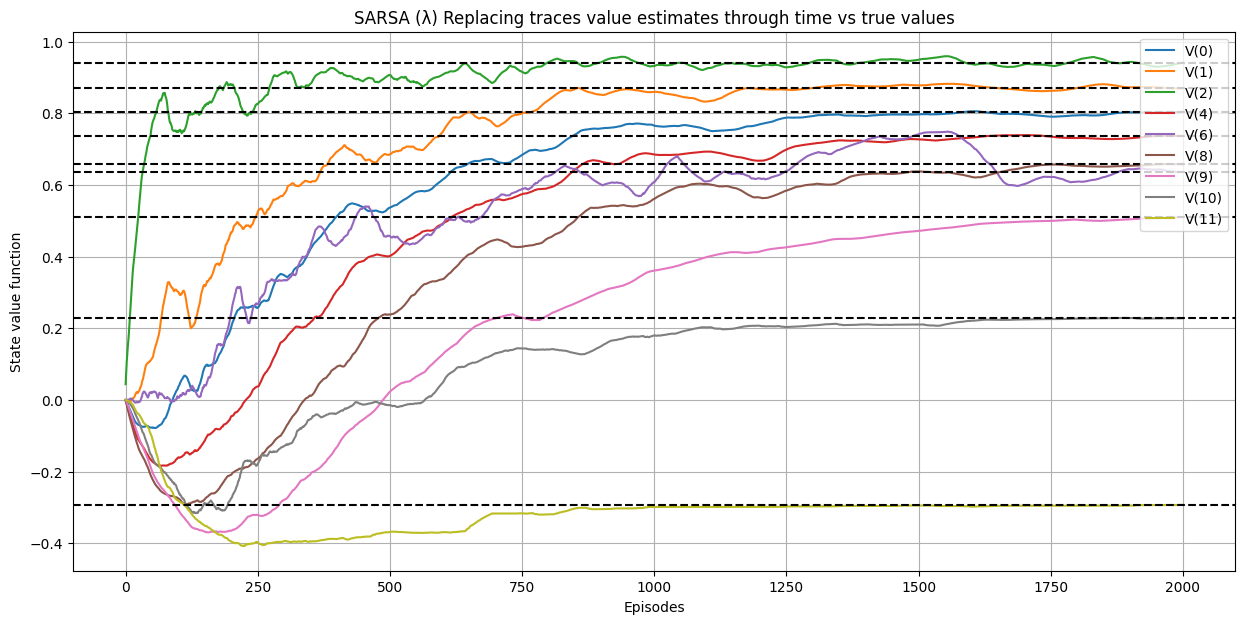

In [ ]:
seeds = list(np.arange(100, 150))
numEpisodes = 2000
maxSteps = 100
gamma = 0.99
mctype = "FVMC"
decayType = "exponential"
trace_decay = 0.3

cumulative_state_values = {s : [0]*numEpisodes for s in range(12) if s not in [3,5,7]}
true_values = [0]*9
# iterating through various seeds (TD)
for seed in seeds:
  global_seed = int(seed)
  q_values, state_values, policy, q_episodes = replacingSARSA(env, gamma, trace_decay, decaytype, maxSteps, numEpisodes, global_seed, replaceTrace = True)
  true_values = list(map(add, true_values, [state_values[numEpisodes - 1][i] for i in range(12) if i not in [3, 5, 7]]))
  for state in range(12):
    if state not in [3,5,7]:
      values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]

      # taking the cumulative sum for each state over different seeds
      cumulative_state_values[state] = list(map(add, cumulative_state_values[state], values_per_state))

avg_state_values = {state: [value / len(seeds) for value in values] for state, values in cumulative_state_values.items()}
true_values = [value / len(seeds) for value in true_values]

plt.figure(figsize=(15, 7))

# Plot the estimated values for each state
for state in range(12):  # Loop through non-terminal states
    if state not in [3,5,7]:
      plt.plot(avg_state_values[state], label=f'V({state})')

# Plot the true values for each state as horizontal lines
for state, true_value in enumerate(true_values, start=1):
    plt.axhline(y=true_value, color='k', linestyle='--')

plt.xlabel('Episodes')
plt.ylabel('State value function')
plt.title('SARSA (λ) Replacing traces value estimates through time vs true values')
plt.legend(loc = "upper right")
plt.grid()
plt.show()

# Q function Estimates vs Episodes

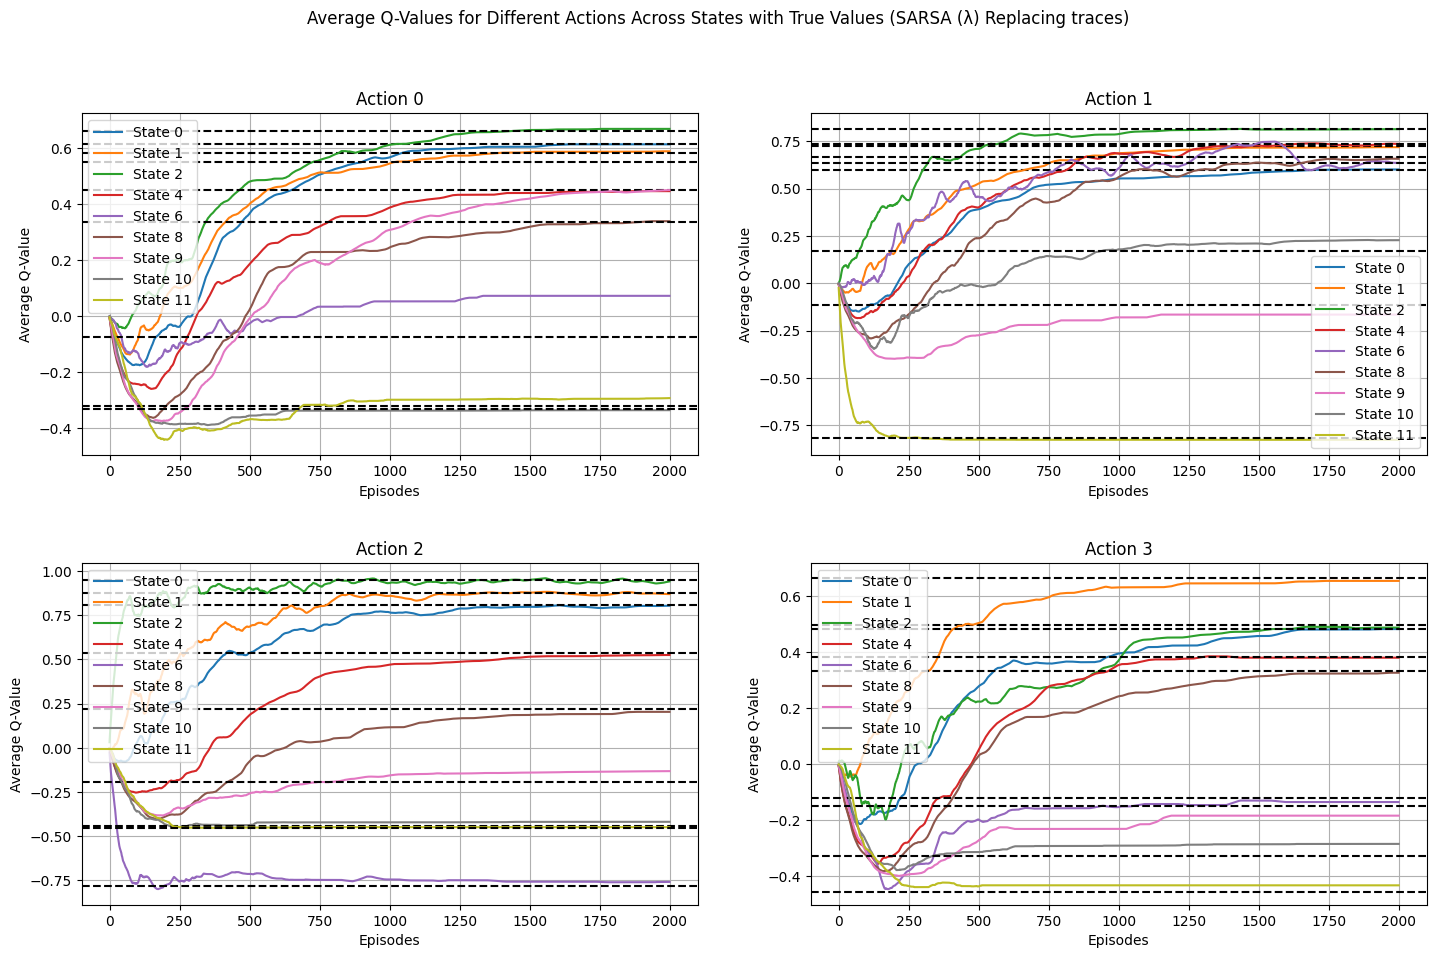

In [ ]:
numActions = 4  # Assuming 4 actions
states_to_plot = [0, 1, 2, 4, 6, 8, 9, 10, 11] # non terminal states
seeds = list(np.arange(100, 150))
numEpisodes = 2000
maxSteps = 100
gamma = 0.99
mctype = "FVMC"
decayType = "exponential"
trace_decay = 0.3

# Initialize cumulative Q-values
cumulative_q_values = {state: {action: [0] * numEpisodes for action in range(numActions)} for state in states_to_plot}

# Iterate over seeds
for seed in seeds:
    global_seed = int(seed)
    _, _, _, q_values = replacingSARSA(env, gamma, trace_decay, decaytype, maxSteps, numEpisodes, global_seed, replaceTrace = True)

    for state in states_to_plot:
        for action in range(numActions):
            for episode in range(numEpisodes):
                cumulative_q_values[state][action][episode] += q_values[episode][state][action]

# Calculate average Q-values
avg_q_values = {state: {action: [cumulative_q_values[state][action][episode] / len(seeds) for episode in range(numEpisodes)]
                        for action in range(numActions)} for state in states_to_plot}
true_q_values = {state: {action: q_values[numEpisodes - 1][state][action] for action in range(numActions)} for state in states_to_plot}

# Plotting with true values
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for i, action in enumerate(range(numActions)):
    ax = axes[i // 2, i % 2]
    for state in states_to_plot:
        # Plot average Q-values
        ax.plot(avg_q_values[state][action], label=f'State {state}')
        # Plot true values as horizontal lines
        ax.axhline(y=true_q_values[state][action], color='k', linestyle='--')

    ax.set_title(f'Action {action}')
    ax.set_xlabel('Episodes')
    ax.set_ylabel('Average Q-Value')
    ax.legend()
    ax.grid()

plt.suptitle('Average Q-Values for Different Actions Across States with True Values (SARSA (λ) Replacing traces)')
plt.tight_layout(pad=3.0)
plt.show()

# Implementing the SARSA (λ) algorithm with Accumulating Eligibility Traces

In [ ]:
# implementing the accumulating SARSA algorithm
def accumulatingSARSA(env, gamma, trace_decay, decaytype, maxSteps, numEpisode, global_seed, replaceTrace):
  q_values = np.zeros((env.observation_space.n, 4))
  q_episodes = np.zeros((numEpisodes, env.observation_space.n, 4))
  values_eps = []
  alphas = decayAlpha(0.1, 0.01, numEpisodes, decaytype)
  epsilons = decayAlpha(1, 0.01, numEpisodes, decaytype)
  traces = np.zeros((env.observation_space.n, 4)) # stores the visited states : eligibility traces
  # iterating over the episodes
  for episode in range(numEpisodes):
    episode_seed = global_seed + episode
    state = env.reset(seed = episode_seed)

    for step in range(maxSteps):
      action = actionSelect(state, q_values, epsilons[episode], env)
      next_state, reward, done, _ = env.step(action)
      next_action = actionSelect(next_state, q_values, epsilons[episode], env)
      td_target = reward + (gamma * q_values[next_state, next_action]) if not done else reward
      td_error = td_target - q_values[state, action]

      # stores the count of visited state-action pairs for learning long term consequences of actions
      traces[state, action] += 1

      # resets the trace in case of replacing traces
      if replaceTrace == True:
        traces = np.clip(traces, 0, 1)

      q_values[state, action] += alphas[episode] * td_error * traces[state, action]
      traces[state, action] = gamma * trace_decay * traces[state, action]
      state, action = next_state, next_action

      if done:
        break

    q_episodes[episode] = q_values.copy()
    values_eps.append(list(np.max(q_values.copy(), axis = 1)))

  value_states = np.max(q_values, axis=1)  # Calculates the state value function
  policy = np.argmax(q_values, axis=1)  # Calculates the optimal policy

  return q_values, values_eps, policy, q_episodes

In [ ]:
gamma = 0.99
decaytype = "exponential"
maxSteps = 100
numEpisodes = 2000
mctype = "FVMC"
global_seed = 123
trace_decay = 0.3

env = RandomMazeEnv(seed=global_seed)
q_values, state_values, policy, q_episodes = accumulatingSARSA(env, gamma, trace_decay, decaytype, maxSteps, numEpisodes, global_seed, replaceTrace = False)

# print(values[-1])
print("Printing optimal policy")
print(policy)
print("Optimal policy: " , [env.directions[dir] for dir in policy])
print(state_values[numEpisodes - 1])
print(q_values)

Printing optimal policy
[2 2 2 0 1 0 1 0 1 0 1 0]
Optimal policy:  ['right', 'right', 'right', 'left', 'up', 'left', 'up', 'left', 'up', 'left', 'up', 'left']
[0.8056150009390182, 0.866454966306929, 0.9419155943137756, 0.0, 0.7397267229111468, 0.0, 0.6279330655652109, 0.0, 0.6715487462457178, 0.5787161711404721, 0.28781063063375123, -0.3298703920325978]
[[ 0.6700601   0.66641112  0.805615    0.55485519]
 [ 0.65394892  0.7682919   0.86645497  0.70911695]
 [ 0.72645044  0.82646115  0.94191559  0.57245435]
 [ 0.          0.          0.          0.        ]
 [ 0.54059606  0.73972672  0.59992657  0.47512481]
 [ 0.          0.          0.          0.        ]
 [ 0.08875289  0.62793307 -0.7960491  -0.10221858]
 [ 0.          0.          0.          0.        ]
 [ 0.4589012   0.67154875  0.34522344  0.45067417]
 [ 0.57871617 -0.04863128 -0.14790806 -0.11188522]
 [-0.39454006  0.28781063 -0.54124382 -0.39670048]
 [-0.32987039 -0.8755745  -0.60237424 -0.57645055]]


# Value Estimates vs Episodes

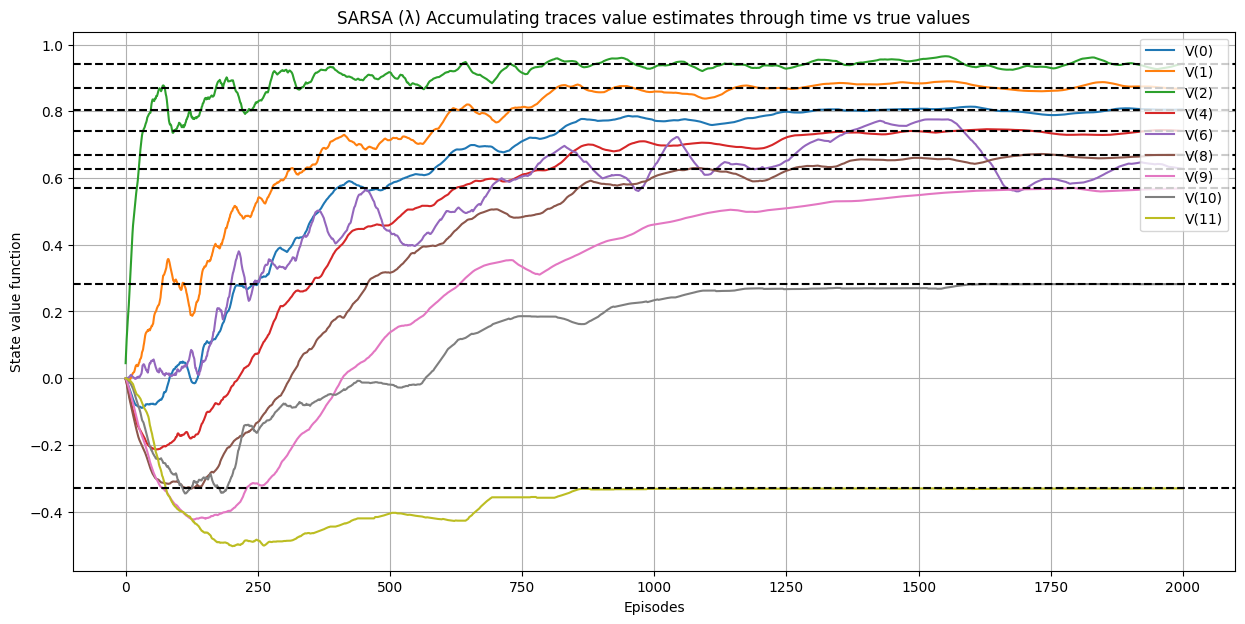

In [ ]:
seeds = list(np.arange(100, 150))
numEpisodes = 2000
maxSteps = 100
gamma = 0.99
mctype = "FVMC"
trace_decay = 0.3
decayType = "exponential"

cumulative_state_values = {s : [0]*numEpisodes for s in range(12) if s not in [3,5,7]}
true_values = [0]*9
# iterating through various seeds (TD)
for seed in seeds:
  global_seed = int(seed)
  q_values, state_values, policy, q_episodes = accumulatingSARSA(env, gamma, trace_decay, decaytype, maxSteps, numEpisodes, global_seed, replaceTrace = False)
  true_values = list(map(add, true_values, [state_values[numEpisodes - 1][i] for i in range(12) if i not in [3, 5, 7]]))
  for state in range(12):
    if state not in [3,5,7]:
      values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]

      # taking the cumulative sum for each state over different seeds
      cumulative_state_values[state] = list(map(add, cumulative_state_values[state], values_per_state))

avg_state_values = {state: [value / len(seeds) for value in values] for state, values in cumulative_state_values.items()}
true_values = [value / len(seeds) for value in true_values]

plt.figure(figsize=(15, 7))

# Plot the estimated values for each state
for state in range(12):  # Loop through non-terminal states
    if state not in [3,5,7]:
      plt.plot(avg_state_values[state], label=f'V({state})')

# Plot the true values for each state as horizontal lines
for state, true_value in enumerate(true_values, start=1):
    plt.axhline(y=true_value, color='k', linestyle='--')

plt.xlabel('Episodes')
plt.ylabel('State value function')
plt.title('SARSA (λ) Accumulating traces value estimates through time vs true values')
plt.legend(loc = "upper right")
plt.grid()
plt.show()

# Q function Estimates vs Episodes

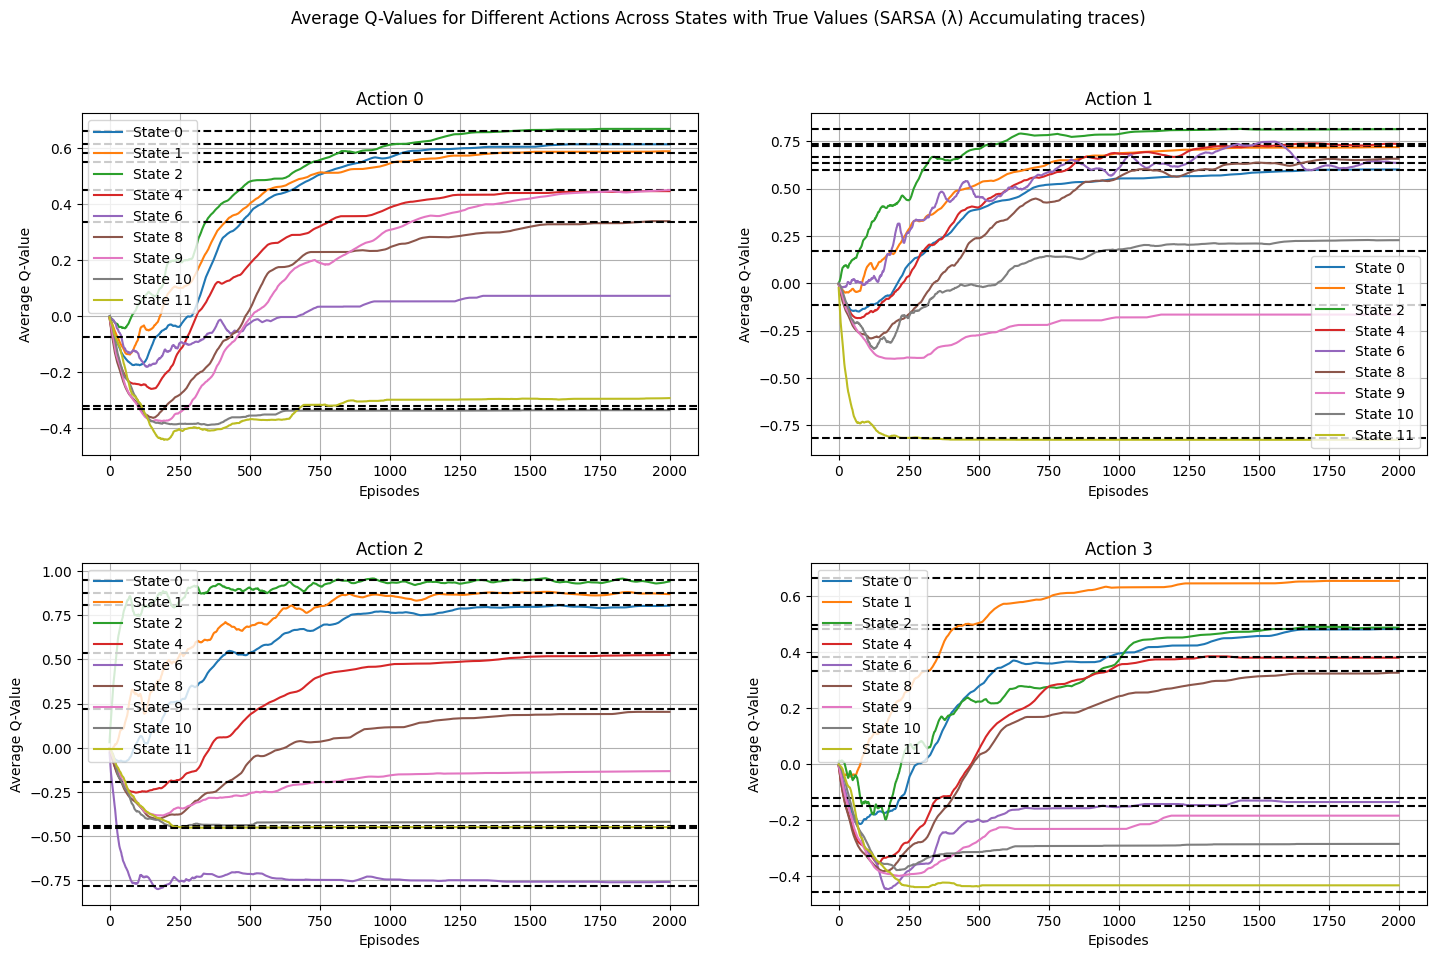

In [ ]:
numActions = 4  # Assuming 4 actions
states_to_plot = [0, 1, 2, 4, 6, 8, 9, 10, 11] # non terminal states
seeds = list(np.arange(100, 150))
numEpisodes = 2000
maxSteps = 100
gamma = 0.99
mctype = "FVMC"
decayType = "exponential"
trace_decay = 0.3

# Initialize cumulative Q-values
cumulative_q_values = {state: {action: [0] * numEpisodes for action in range(numActions)} for state in states_to_plot}

# Iterate over seeds
for seed in seeds:
    global_seed = int(seed)
    _, _, _, q_values = accumulatingSARSA(env, gamma, trace_decay, decaytype, maxSteps, numEpisodes, global_seed, replaceTrace = False)

    for state in states_to_plot:
        for action in range(numActions):
            for episode in range(numEpisodes):
                cumulative_q_values[state][action][episode] += q_values[episode][state][action]

# Calculate average Q-values
avg_q_values = {state: {action: [cumulative_q_values[state][action][episode] / len(seeds) for episode in range(numEpisodes)]
                        for action in range(numActions)} for state in states_to_plot}
true_q_values = {state: {action: q_values[numEpisodes - 1][state][action] for action in range(numActions)} for state in states_to_plot}

# Plotting with true values
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for i, action in enumerate(range(numActions)):
    ax = axes[i // 2, i % 2]
    for state in states_to_plot:
        # Plot average Q-values
        ax.plot(avg_q_values[state][action], label=f'State {state}')
        # Plot true values as horizontal lines
        ax.axhline(y=true_q_values[state][action], color='k', linestyle='--')

    ax.set_title(f'Action {action}')
    ax.set_xlabel('Episodes')
    ax.set_ylabel('Average Q-Value')
    ax.legend()
    ax.grid()

plt.suptitle('Average Q-Values for Different Actions Across States with True Values (SARSA (λ) Accumulating traces)')
plt.tight_layout(pad=3.0)
plt.show()

# Implementing the Q(λ) with Replacing Eligibility Traces

In [ ]:
# implementing the Q learning with replacing eligibility traces
def replacingQ(env, gamma, trace_decay, decaytype, maxSteps, numEpisodes, global_seed, replaceTrace):
  q_values = np.zeros((env.observation_space.n, 4))
  q_episodes = np.zeros((numEpisodes, env.observation_space.n, 4))
  values_eps = []
  alphas = decayAlpha(0.1, 0.01, numEpisodes, decaytype)
  epsilons = decayAlpha(1, 0.01, numEpisodes, decaytype)
  traces = np.zeros((env.observation_space.n, 4)) # stores the visited states : eligibility traces

  for episode in range(numEpisodes):
    episode_seed = global_seed + episode
    state = env.reset(seed = episode_seed)

    # iterating over maxSteps in each episode
    for step in range(maxSteps):
      action = actionSelect(state, q_values, epsilons[episode], env)
      next_state, reward, done, _ = env.step(action)
      next_action = actionSelect(next_state, q_values, epsilons[episode], env)
      td_target = reward + (gamma * np.max(q_values[next_state])) if not done else reward
      td_error = td_target - q_values[state, action]
      # stores the count of visited state-action pairs for learning long term consequences of actions
      traces[state, action] += 1

      # resets the trace in case of replacing traces
      if replaceTrace == True:
        traces = np.clip(traces, 0, 1)
      q_values[state, action] += alphas[episode] * td_error * traces[state, action]
      traces[state, action] = gamma * trace_decay * traces[state, action]

      state = next_state

      if done:
        break

    q_episodes[episode] = q_values.copy()
    values_eps.append(list(np.max(q_values.copy(), axis = 1)))

  value_states = np.max(q_values, axis=1)  # Calculates the state value function
  policy = np.argmax(q_values, axis=1)  # Calculates the optimal policy

  return q_values, values_eps, policy, q_episodes

In [ ]:
gamma = 0.99
decaytype = "exponential"
maxSteps = 100
numEpisodes = 2000
mctype = "FVMC"
global_seed = 123
trace_decay = 0.3

env = RandomMazeEnv(seed=global_seed)
q_values, state_values, policy, q_episodes = replacingQ(env, gamma, trace_decay, decaytype, maxSteps, numEpisodes, global_seed, replaceTrace = True)

# print(values[-1])
print("Printing optimal policy")
print(policy)
print("Optimal policy: " , [env.directions[dir] for dir in policy])
print(state_values[numEpisodes - 1])
print(q_values)

Printing optimal policy
[2 2 2 0 1 0 1 0 1 0 0 0]
Optimal policy:  ['right', 'right', 'right', 'left', 'up', 'left', 'up', 'left', 'up', 'left', 'left', 'left']
[0.8089872986542079, 0.8701447928411836, 0.936081431071451, 0.0, 0.7451535918687837, 0.0, 0.591306225741321, 0.0, 0.6768869613069615, 0.608571928186153, 0.4883197860612817, 0.1875796274796338]
[[ 7.56273767e-01  7.66620977e-01  8.08987299e-01  7.25704027e-01]
 [ 7.75504178e-01  8.29364469e-01  8.70144793e-01  8.30166344e-01]
 [ 8.01384424e-01  8.71946615e-01  9.36081431e-01  5.48224091e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 7.10091864e-01  7.45153592e-01  7.01429586e-01  6.47294700e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.43726865e-01  5.91306226e-01 -5.84109493e-01  3.99971378e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 6.43370183e-01  6.76886961e-01  6.01218556e-01  6.30849894e-01]
 [ 6.08571928e-01  5.80026449e-01  4.444609

# Value Estimates vs Episodes

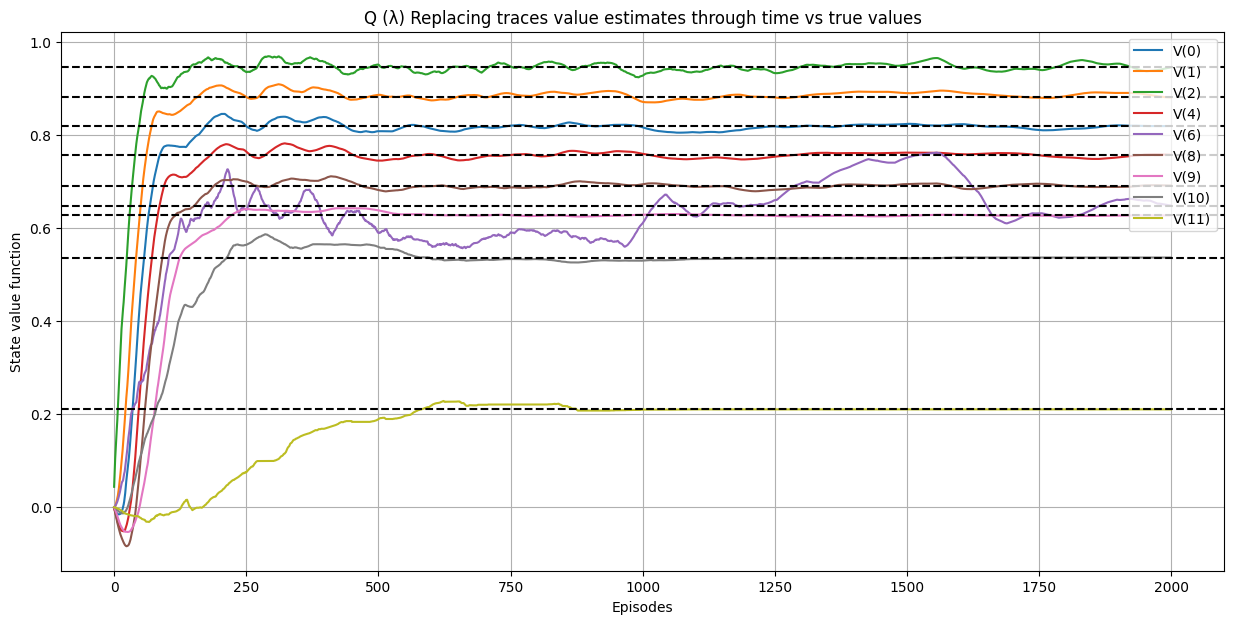

In [ ]:
seeds = list(np.arange(100, 150))
numEpisodes = 2000
maxSteps = 100
gamma = 0.99
mctype = "FVMC"
trace_decay = 0.3
decayType = "exponential"

cumulative_state_values = {s : [0]*numEpisodes for s in range(12) if s not in [3,5,7]}
true_values = [0]*9
# iterating through various seeds (TD)
for seed in seeds:
  global_seed = int(seed)
  q_values, state_values, policy, q_episodes = replacingQ(env, gamma, trace_decay, decaytype, maxSteps, numEpisodes, global_seed, replaceTrace = True)
  true_values = list(map(add, true_values, [state_values[numEpisodes - 1][i] for i in range(12) if i not in [3, 5, 7]]))
  for state in range(12):
    if state not in [3,5,7]:
      values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]

      # taking the cumulative sum for each state over different seeds
      cumulative_state_values[state] = list(map(add, cumulative_state_values[state], values_per_state))

avg_state_values = {state: [value / len(seeds) for value in values] for state, values in cumulative_state_values.items()}
true_values = [value / len(seeds) for value in true_values]

plt.figure(figsize=(15, 7))

# Plot the estimated values for each state
for state in range(12):  # Loop through non-terminal states
    if state not in [3,5,7]:
      plt.plot(avg_state_values[state], label=f'V({state})')

# Plot the true values for each state as horizontal lines
for state, true_value in enumerate(true_values, start=1):
    plt.axhline(y=true_value, color='k', linestyle='--')

plt.xlabel('Episodes')
plt.ylabel('State value function')
plt.title('Q (λ) Replacing traces value estimates through time vs true values')
plt.legend(loc = "upper right")
plt.grid()
plt.show()

# Q function estimates vs Episodes

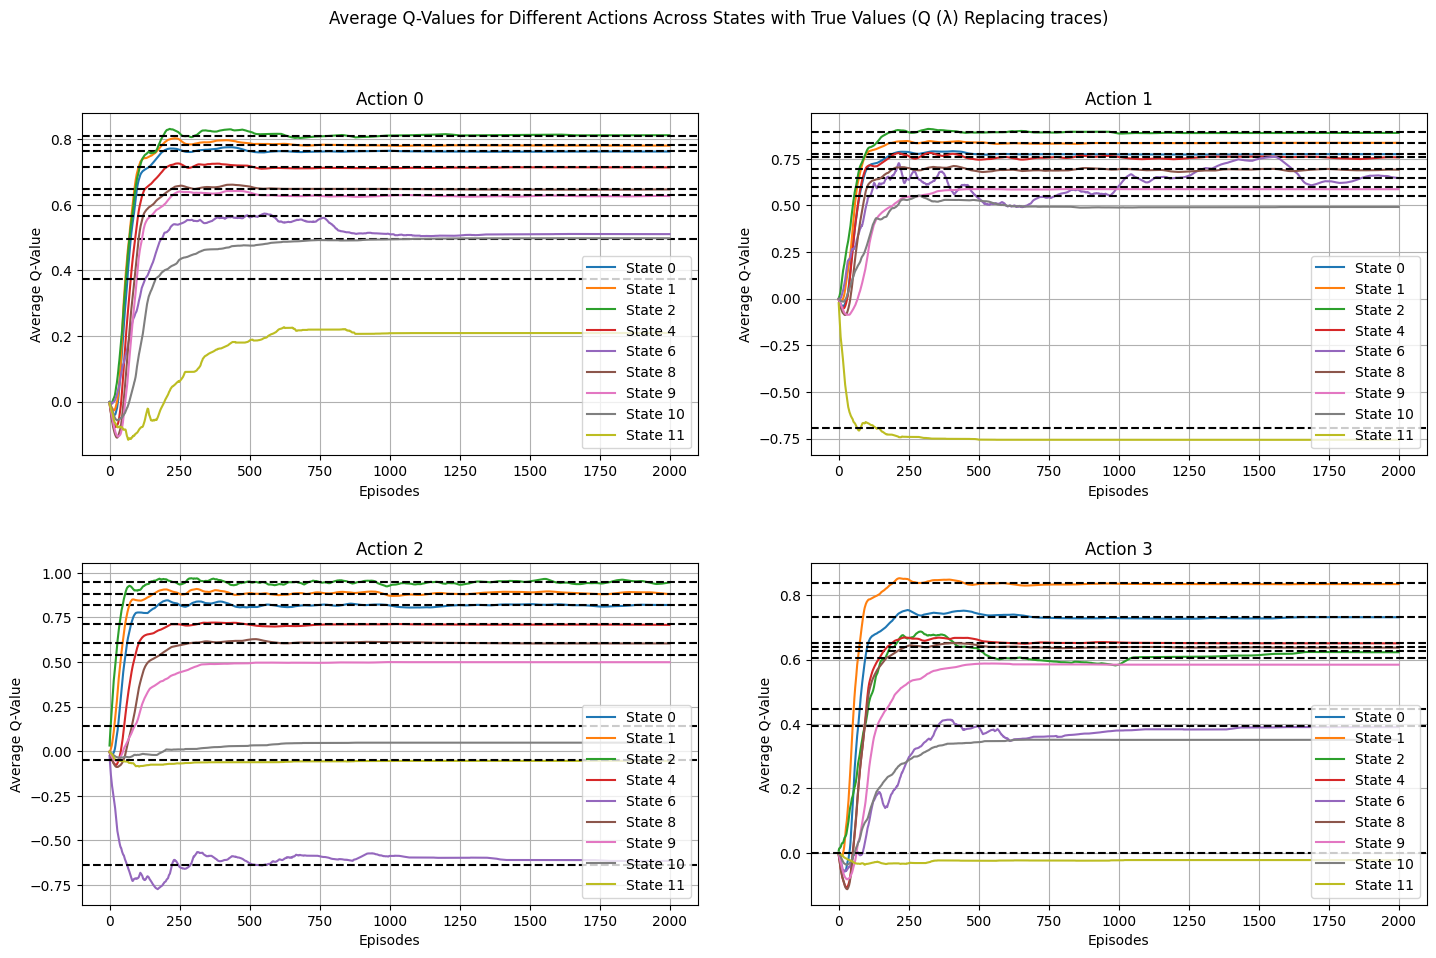

In [ ]:
numActions = 4  # Assuming 4 actions
states_to_plot = [0, 1, 2, 4, 6, 8, 9, 10, 11] # non terminal states
seeds = list(np.arange(100, 150))
numEpisodes = 2000
maxSteps = 100
gamma = 0.99
mctype = "FVMC"
decayType = "exponential"
trace_decay = 0.3

# Initialize cumulative Q-values
cumulative_q_values = {state: {action: [0] * numEpisodes for action in range(numActions)} for state in states_to_plot}

# Iterate over seeds
for seed in seeds:
    global_seed = int(seed)
    _, _, _, q_values = replacingQ(env, gamma, trace_decay, decaytype, maxSteps, numEpisodes, global_seed, replaceTrace = True)

    for state in states_to_plot:
        for action in range(numActions):
            for episode in range(numEpisodes):
                cumulative_q_values[state][action][episode] += q_values[episode][state][action]

# Calculate average Q-values
avg_q_values = {state: {action: [cumulative_q_values[state][action][episode] / len(seeds) for episode in range(numEpisodes)]
                        for action in range(numActions)} for state in states_to_plot}
true_q_values = {state: {action: q_values[numEpisodes - 1][state][action] for action in range(numActions)} for state in states_to_plot}

# Plotting with true values
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for i, action in enumerate(range(numActions)):
    ax = axes[i // 2, i % 2]
    for state in states_to_plot:
        # Plot average Q-values
        ax.plot(avg_q_values[state][action], label=f'State {state}')
        # Plot true values as horizontal lines
        ax.axhline(y=true_q_values[state][action], color='k', linestyle='--')

    ax.set_title(f'Action {action}')
    ax.set_xlabel('Episodes')
    ax.set_ylabel('Average Q-Value')
    ax.legend()
    ax.grid()

plt.suptitle('Average Q-Values for Different Actions Across States with True Values (Q (λ) Replacing traces)')
plt.tight_layout(pad=3.0)
plt.show()

# Implementing the Q (λ) with accumulating Eligibility Traces

In [ ]:
# implementing the Q learning with replacing eligibility traces
def accumulatingQ(env, gamma, trace_decay, decaytype, maxSteps, numEpisodes, global_seed, replaceTrace):
  q_values = np.zeros((env.observation_space.n, 4))
  q_episodes = np.zeros((numEpisodes, env.observation_space.n, 4))
  values_eps = []
  alphas = decayAlpha(0.1, 0.01, numEpisodes, decaytype)
  epsilons = decayAlpha(1, 0.01, numEpisodes, decaytype)
  traces = np.zeros((env.observation_space.n, 4)) # stores the visited states : eligibility traces

  for episode in range(numEpisodes):
    episode_seed = global_seed + episode
    state = env.reset(seed = episode_seed)

    # iterating over maxSteps in each episode
    for step in range(maxSteps):
      action = actionSelect(state, q_values, epsilons[episode], env)
      next_state, reward, done, _ = env.step(action)
      next_action = actionSelect(next_state, q_values, epsilons[episode], env)
      td_target = reward + (gamma * np.max(q_values[next_state])) if not done else reward
      td_error = td_target - q_values[state, action]
      # stores the count of visited state-action pairs for learning long term consequences of actions
      traces[state, action] += 1

      # resets the trace in case of replacing traces
      if replaceTrace == True:
        traces = np.clip(traces, 0, 1)
      q_values[state, action] += alphas[episode] * td_error * traces[state, action]
      traces[state, action] = gamma * trace_decay * traces[state, action]

      state = next_state

      if done:
        break

    q_episodes[episode] = q_values.copy()
    values_eps.append(list(np.max(q_values.copy(), axis = 1)))

  value_states = np.max(q_values, axis=1)  # Calculates the state value function
  policy = np.argmax(q_values, axis=1)  # Calculates the optimal policy

  return q_values, values_eps, policy, q_episodes

In [ ]:
gamma = 0.99
decaytype = "exponential"
maxSteps = 100
numEpisodes = 2000
mctype = "FVMC"
global_seed = 123
trace_decay = 0.3

env = RandomMazeEnv(seed = global_seed)
q_values, state_values, policy, q_episodes = accumulatingQ(env, gamma, trace_decay, decaytype, maxSteps, numEpisodes, global_seed, replaceTrace = False)

# print(values[-1])
print("Printing optimal policy")
print(policy)
print("Optimal policy: " , [env.directions[dir] for dir in policy])
print(state_values[numEpisodes - 1])
print(q_values)

Printing optimal policy
[2 2 2 0 1 0 1 0 1 0 0 0]
Optimal policy:  ['right', 'right', 'right', 'left', 'up', 'left', 'up', 'left', 'up', 'left', 'left', 'left']
[0.8171321792250663, 0.8734042756918937, 0.9441828653619558, 0.0, 0.7578037557764731, 0.0, 0.6363864682436433, 0.0, 0.6938368573987262, 0.6299348623102791, 0.5664948468953804, 0.3188273314482073]
[[ 0.76365421  0.77853929  0.81713218  0.73115628]
 [ 0.7823294   0.84032655  0.87340428  0.83440196]
 [ 0.81493439  0.88043267  0.94418287  0.6572106 ]
 [ 0.          0.          0.          0.        ]
 [ 0.7162123   0.75780376  0.70960942  0.6502849 ]
 [ 0.          0.          0.          0.        ]
 [ 0.51024726  0.63638647 -0.76268004  0.43232446]
 [ 0.          0.          0.          0.        ]
 [ 0.64792055  0.69383686  0.59973442  0.63707753]
 [ 0.62993486  0.59893558  0.53890596  0.59717348]
 [ 0.56649485  0.50736393  0.10854206  0.44196055]
 [ 0.31882733 -0.79338211 -0.03421198  0.01041645]]


# Value Estimates vs Episodes

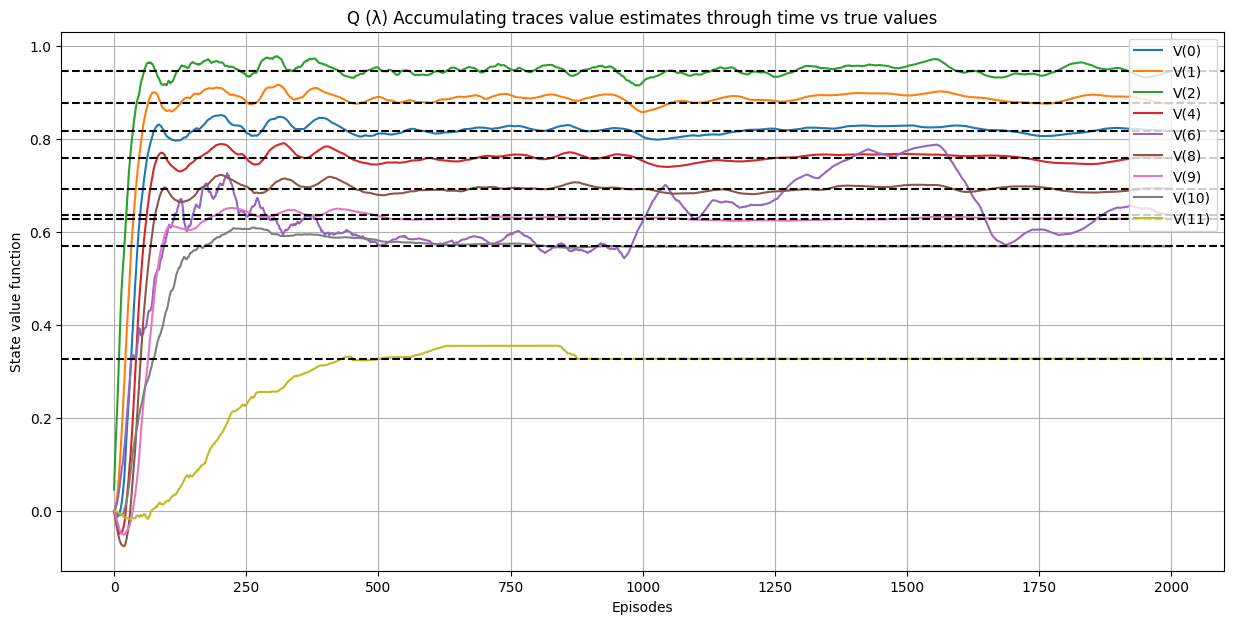

In [ ]:
seeds = list(np.arange(100, 150))
numEpisodes = 2000
maxSteps = 100
gamma = 0.99
mctype = "FVMC"
trace_decay = 0.3
decayType = "exponential"

cumulative_state_values = {s : [0]*numEpisodes for s in range(12) if s not in [3,5,7]}
true_values = [0]*9
# iterating through various seeds (TD)
for seed in seeds:
  global_seed = int(seed)
  q_values, state_values, policy, q_episodes = accumulatingQ(env, gamma, trace_decay, decaytype, maxSteps, numEpisodes, global_seed, replaceTrace = False)
  true_values = list(map(add, true_values, [state_values[numEpisodes - 1][i] for i in range(12) if i not in [3, 5, 7]]))
  for state in range(12):
    if state not in [3,5,7]:
      values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]

      # taking the cumulative sum for each state over different seeds
      cumulative_state_values[state] = list(map(add, cumulative_state_values[state], values_per_state))

avg_state_values = {state: [value / len(seeds) for value in values] for state, values in cumulative_state_values.items()}
true_values = [value / len(seeds) for value in true_values]

plt.figure(figsize=(15, 7))

# Plot the estimated values for each state
for state in range(12):  # Loop through non-terminal states
    if state not in [3,5,7]:
      plt.plot(avg_state_values[state], label=f'V({state})')

# Plot the true values for each state as horizontal lines
for state, true_value in enumerate(true_values, start=1):
    plt.axhline(y=true_value, color='k', linestyle='--')

plt.xlabel('Episodes')
plt.ylabel('State value function')
plt.title('Q (λ) Accumulating traces value estimates through time vs true values')
plt.legend(loc = "upper right")
plt.grid()
plt.show()

# Q function Estimates vs Episodes

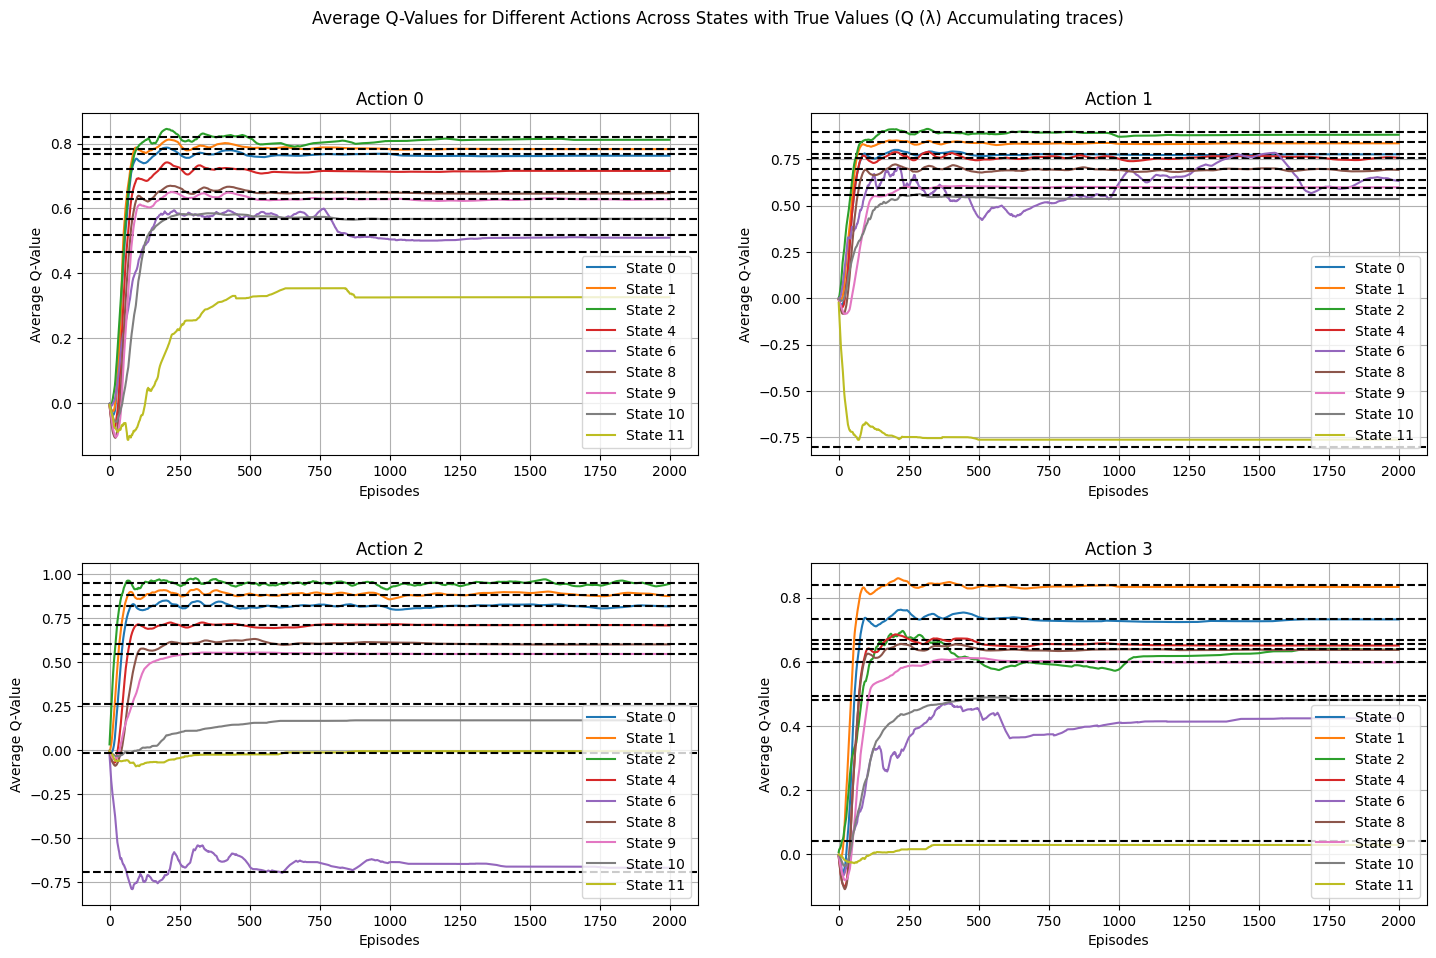

In [ ]:
numActions = 4  # Assuming 4 actions
states_to_plot = [0, 1, 2, 4, 6, 8, 9, 10, 11] # non terminal states
seeds = list(np.arange(100, 150))
numEpisodes = 2000
maxSteps = 100
gamma = 0.99
mctype = "FVMC"
decayType = "exponential"
trace_decay = 0.3

# Initialize cumulative Q-values
cumulative_q_values = {state: {action: [0] * numEpisodes for action in range(numActions)} for state in states_to_plot}

# Iterate over seeds
for seed in seeds:
    global_seed = int(seed)
    _, _, _, q_values = accumulatingQ(env, gamma, trace_decay, decaytype, maxSteps, numEpisodes, global_seed, replaceTrace = False)

    for state in states_to_plot:
        for action in range(numActions):
            for episode in range(numEpisodes):
                cumulative_q_values[state][action][episode] += q_values[episode][state][action]

# Calculate average Q-values
avg_q_values = {state: {action: [cumulative_q_values[state][action][episode] / len(seeds) for episode in range(numEpisodes)]
                        for action in range(numActions)} for state in states_to_plot}
true_q_values = {state: {action: q_values[numEpisodes - 1][state][action] for action in range(numActions)} for state in states_to_plot}

# Plotting with true values
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for i, action in enumerate(range(numActions)):
    ax = axes[i // 2, i % 2]
    for state in states_to_plot:
        # Plot average Q-values
        ax.plot(avg_q_values[state][action], label=f'State {state}')
        # Plot true values as horizontal lines
        ax.axhline(y=true_q_values[state][action], color='k', linestyle='--')

    ax.set_title(f'Action {action}')
    ax.set_xlabel('Episodes')
    ax.set_ylabel('Average Q-Value')
    ax.legend()
    ax.grid()

plt.suptitle('Average Q-Values for Different Actions Across States with True Values (Q (λ) Accumulating traces)')
plt.tight_layout(pad=3.0)
plt.show()

# Implementing Dyna-Q learning algorithm

In [ ]:
# implementing the Dyna-Q algorithm
def calc_visited_states_and_actions(T):
  states_visited, actions_taken = np.where(np.sum(T, axis = 2) > 0)
  return states_visited, actions_taken

def DynaQ(env, gamma, decayType, maxSteps, numEpisodes, numPlanning, global_seed):
  q_values = np.zeros((env.observation_space.n, 4))
  T = np.zeros((env.observation_space.n, 4, env.observation_space.n))  # Transition counts
  R = np.zeros((env.observation_space.n, 4, env.observation_space.n))  # Reward model
  alphas = decayAlpha(0.1, 0.01, numEpisodes, decayType)
  epsilons = decayAlpha(1, 0.01, numEpisodes, decayType)
  q_episodes = np.zeros((numEpisodes, env.observation_space.n, 4))
  values_eps = []

  # iterating over the episodes
  for episode in range(numEpisodes):
    episode_seed = global_seed + episode
    state = env.reset(seed = episode_seed)

    # iterating over maxSteps
    for step in range(maxSteps):

      # choosing an action based on epsilon-greedy strategy
      action = actionSelect(state, q_values, epsilons[episode], env)
      next_state, reward, done, _ = env.step(action)

      # Update transition and reward models
      T[state, action, next_state] += 1
      R[state, action, next_state] += (reward - R[state, action, next_state]) / T[state, action, next_state]

      # Direct learning
      td_target = reward + gamma * np.max(q_values[next_state]) if not done else reward
      td_error = td_target - q_values[state, action]
      q_values[state, action] += alphas[episode] * td_error
      state_backup = next_state

      # Planning with model-based learning
      for _ in range(numPlanning):
        states_visited, actions_taken = calc_visited_states_and_actions(T)
        if len(states_visited) == 0:
            break
        sample_idx = env.np_random.choice(len(states_visited))
        state_chosen, action_taken = states_visited[sample_idx], actions_taken[sample_idx]
        sum_T = np.sum(T[state_chosen, action_taken])
        probs = T[state_chosen, action_taken] / sum_T
        next_state_chosen = env.np_random.choice(env.observation_space.n, p = probs)
        r = R[state_chosen, action_taken, next_state_chosen]
        td_target = r + gamma * np.max(q_values[next_state_chosen])
        td_err = td_target - q_values[state_chosen, action_taken]
        q_values[state_chosen, action_taken] += alphas[episode] * td_err

      state = state_backup
      if done:
        break

    q_episodes[episode] = q_values.copy()
    values_eps.append(np.max(q_values, axis=1))

  value_states = np.max(q_values, axis=1)
  policy = np.argmax(q_values, axis=1)

  return q_values, values_eps, policy, q_episodes

In [ ]:
gamma = 0.99
decaytype = "exponential"
maxSteps = 100
numEpisodes = 2000
numPlanning = 5
mctype = "FVMC"
global_seed = 123
trace_decay = 0.3

env = RandomMazeEnv(seed = global_seed)
q_values, state_values, policy, q_episodes = DynaQ(env, gamma, decaytype, maxSteps, numEpisodes, numPlanning, global_seed)

# print(values[-1])
print("Printing optimal policy")
print(policy)
print("Optimal policy: " , [env.directions[dir] for dir in policy])
print(state_values[numEpisodes - 1])
print(q_values)

Printing optimal policy
[2 2 2 0 1 0 1 0 1 0 1 0]
Optimal policy:  ['right', 'right', 'right', 'left', 'up', 'left', 'up', 'left', 'up', 'left', 'up', 'left']
[0.81352084 0.88301069 0.95039895 0.         0.75384662 0.
 0.66285655 0.         0.68641567 0.62875412 0.59343579 0.34280037]
[[ 0.76054236  0.77353892  0.81352084  0.72945533]
 [ 0.78101548  0.83334774  0.88301069  0.83430964]
 [ 0.8158928   0.89877362  0.95039895  0.69539   ]
 [ 0.          0.          0.          0.        ]
 [ 0.70765557  0.75384662  0.70783128  0.65931078]
 [ 0.          0.          0.          0.        ]
 [ 0.6473594   0.66285655 -0.61829681  0.41061367]
 [ 0.          0.          0.          0.        ]
 [ 0.6512763   0.68641567  0.60073191  0.64176265]
 [ 0.62875412  0.58461624  0.54863204  0.5854907 ]
 [ 0.58040919  0.59343579  0.35428487  0.52738744]
 [ 0.34280037 -0.43847852  0.22107999  0.33534616]]


# Value estimates vs Episodes

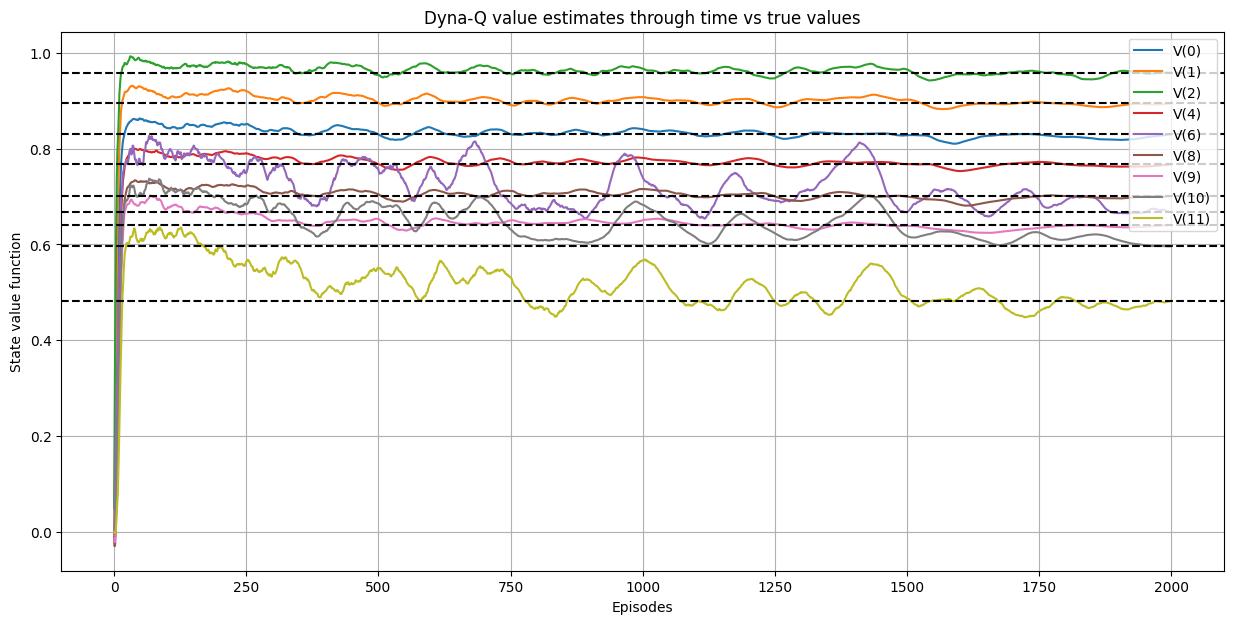

In [ ]:
seeds = list(np.arange(100, 150))
numEpisodes = 2000
maxSteps = 100
gamma = 0.99
mctype = "FVMC"
trace_decay = 0.3
decayType = "exponential"
numPlanning = 10

cumulative_state_values = {s : [0]*numEpisodes for s in range(12) if s not in [3,5,7]}
true_values = [0]*9
# iterating through various seeds (TD)
for seed in seeds:
  global_seed = int(seed)
  q_values, state_values, policy, q_episodes = DynaQ(env, gamma, decaytype, maxSteps, numEpisodes, numPlanning, global_seed)
  true_values = list(map(add, true_values, [state_values[numEpisodes - 1][i] for i in range(12) if i not in [3, 5, 7]]))
  for state in range(12):
    if state not in [3,5,7]:
      values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]

      # taking the cumulative sum for each state over different seeds
      cumulative_state_values[state] = list(map(add, cumulative_state_values[state], values_per_state))

avg_state_values = {state: [value / len(seeds) for value in values] for state, values in cumulative_state_values.items()}
true_values = [value / len(seeds) for value in true_values]

plt.figure(figsize=(15, 7))

# Plot the estimated values for each state
for state in range(12):  # Loop through non-terminal states
    if state not in [3,5,7]:
      plt.plot(avg_state_values[state], label=f'V({state})')

# Plot the true values for each state as horizontal lines
for state, true_value in enumerate(true_values, start=1):
    plt.axhline(y=true_value, color='k', linestyle='--')

plt.xlabel('Episodes')
plt.ylabel('State value function')
plt.title('Dyna-Q value estimates through time vs true values')
plt.legend(loc = "upper right")
plt.grid()
plt.show()

# Q function estimates vs Episodes

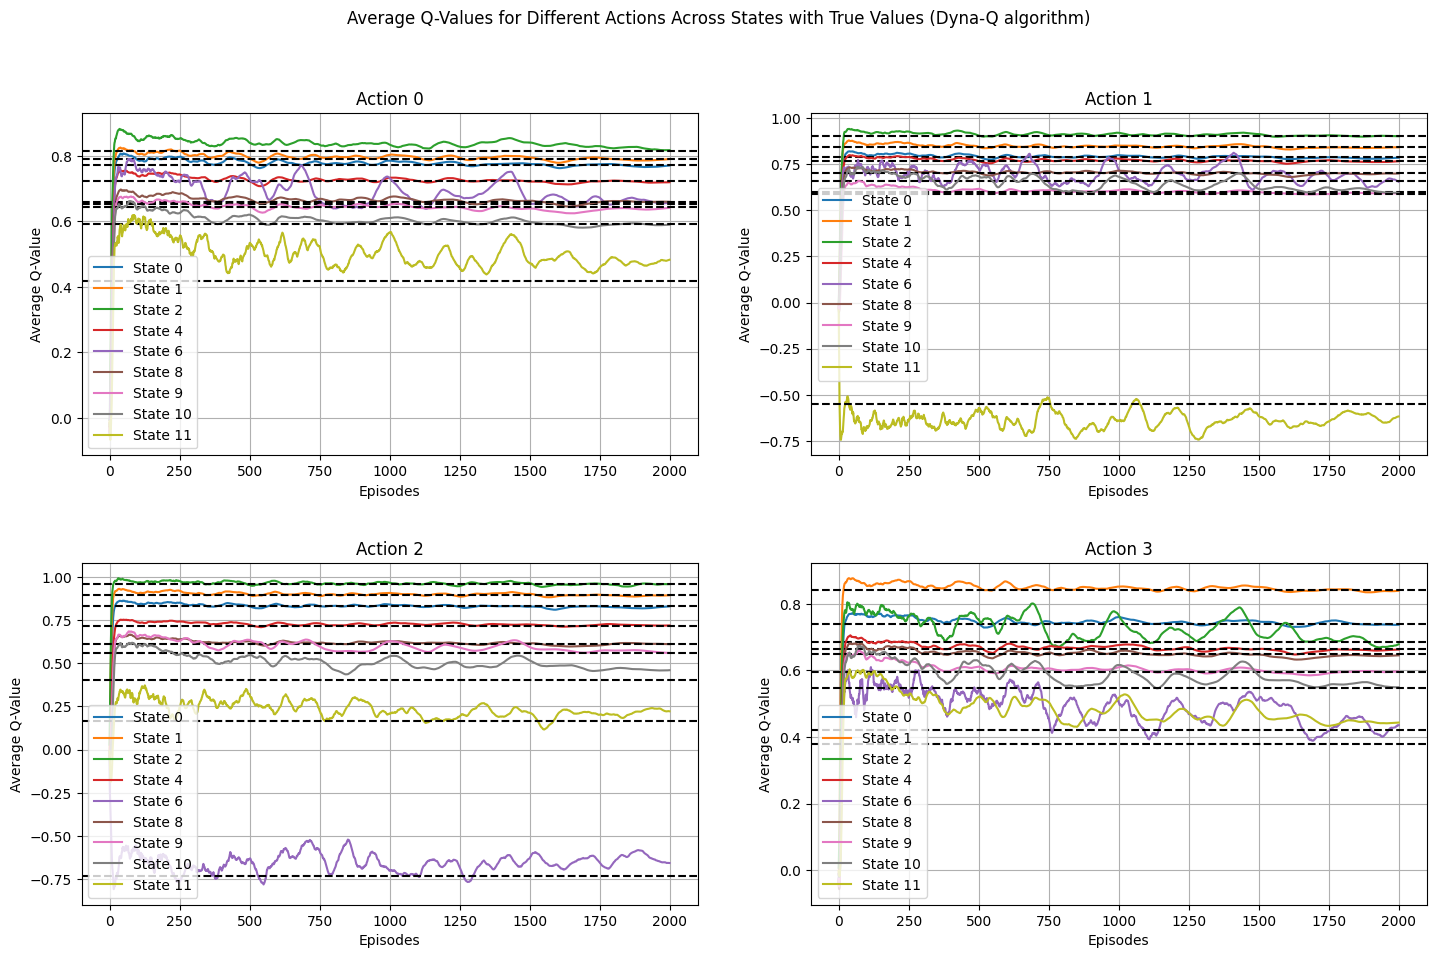

In [ ]:
numActions = 4  # Assuming 4 actions
states_to_plot = [0, 1, 2, 4, 6, 8, 9, 10, 11] # non terminal states
seeds = list(np.arange(100, 150))
numEpisodes = 2000
maxSteps = 100
gamma = 0.99
mctype = "FVMC"
trace_decay = 0.3
decayType = "exponential"
numPlanning = 10

# Initialize cumulative Q-values
cumulative_q_values = {state: {action: [0] * numEpisodes for action in range(numActions)} for state in states_to_plot}

# Iterate over seeds
for seed in seeds:
    global_seed = int(seed)
    _, _, _, q_values = DynaQ(env, gamma, decaytype, maxSteps, numEpisodes, numPlanning, global_seed)

    for state in states_to_plot:
        for action in range(numActions):
            for episode in range(numEpisodes):
                cumulative_q_values[state][action][episode] += q_values[episode][state][action]

# Calculate average Q-values
avg_q_values = {state: {action: [cumulative_q_values[state][action][episode] / len(seeds) for episode in range(numEpisodes)]
                        for action in range(numActions)} for state in states_to_plot}
true_q_values = {state: {action: q_values[numEpisodes - 1][state][action] for action in range(numActions)} for state in states_to_plot}

# Plotting with true values
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for i, action in enumerate(range(numActions)):
    ax = axes[i // 2, i % 2]
    for state in states_to_plot:
        # Plot average Q-values
        ax.plot(avg_q_values[state][action], label=f'State {state}')
        # Plot true values as horizontal lines
        ax.axhline(y=true_q_values[state][action], color='k', linestyle='--')

    ax.set_title(f'Action {action}')
    ax.set_xlabel('Episodes')
    ax.set_ylabel('Average Q-Value')
    ax.legend()
    ax.grid()

plt.suptitle('Average Q-Values for Different Actions Across States with True Values (Dyna-Q algorithm)')
plt.tight_layout(pad=3.0)
plt.show()

# Implementing Trajectory Sampling algorithm for planning and learning

In [ ]:
# Implementing the trajectory sampling algorithm
def trajectorySampling(env, gamma, decayType, maxSteps, numEpisodes, maxTrajectory, global_seed):
    q_values = np.zeros((env.observation_space.n, 4))
    T = np.zeros((env.observation_space.n, 4, env.observation_space.n))  # Transition counts
    R = np.zeros((env.observation_space.n, 4, env.observation_space.n))  # Reward model
    alphas = decayAlpha(0.1, 0.01, numEpisodes, decayType)
    epsilons = decayAlpha(1, 0.01, numEpisodes, decayType)
    q_episodes = np.zeros((numEpisodes, env.observation_space.n, 4))
    values_eps = []

    for episode in range(numEpisodes):
      episode_seed = global_seed + episode
      state = env.reset(seed = episode_seed)

      for step in range(maxSteps):
        action = actionSelect(state, q_values, epsilons[episode], env)
        next_state, reward, done, _ = env.step(action)

        # Updating transition and reward models
        T[state, action, next_state] += 1
        R[state, action, next_state] += (reward - R[state, action, next_state]) / T[state, action, next_state]

        # Direct learning
        td_target = reward + gamma * np.max(q_values[next_state]) if not done else reward
        td_error = td_target - q_values[state, action]
        q_values[state, action] += alphas[episode] * td_error
        state_backup = next_state

        # Planning with model-based learning
        for _ in range(maxTrajectory):
          sampled_state = state
          for _ in range(maxSteps):  # Simulate a trajectory
            sampled_action = actionSelect(sampled_state, q_values, epsilons[episode], env)
            sum_T = np.sum(T[sampled_state, sampled_action])
            if sum_T == 0:
                break

            probs = T[sampled_state, sampled_action] / sum_T
            next_sampled_state = env.np_random.choice(env.observation_space.n, p=probs)
            r = R[sampled_state, sampled_action, next_sampled_state]

            # Update Q-values based on simulated experience
            td_target = r + gamma * np.max(q_values[next_sampled_state])
            td_err = td_target - q_values[sampled_state, sampled_action]
            q_values[sampled_state, sampled_action] += alphas[episode] * td_err
            sampled_state = next_sampled_state

        state = state_backup
        if done:
            break

      q_episodes[episode] = q_values.copy()
      values_eps.append(np.max(q_values, axis=1))

    value_states = np.max(q_values, axis=1)
    policy = np.argmax(q_values, axis=1)

    return q_values, values_eps, policy, q_episodes


In [ ]:
gamma = 0.99
decaytype = "exponential"
maxSteps = 100
numEpisodes = 2000
numPlanning = 5
mctype = "FVMC"
global_seed = 123
trace_decay = 0.3
maxTrajectory = 10

env = RandomMazeEnv(seed = global_seed)
q_values, state_values, policy, q_episodes = trajectorySampling(env, gamma, decaytype, maxSteps, numEpisodes, maxTrajectory, global_seed)

# print(values[-1])
print("Printing optimal policy")
print(policy)
print("Optimal policy: " , [env.directions[dir] for dir in policy])
print(state_values[numEpisodes - 1])
print(q_values)

Printing optimal policy
[2 2 2 0 1 0 1 0 1 0 0 3]
Optimal policy:  ['right', 'right', 'right', 'left', 'up', 'left', 'up', 'left', 'up', 'left', 'left', 'down']
[0.83090855 0.89143038 0.95986412 0.         0.77040588 0.
 0.75515431 0.         0.6991389  0.63602869 0.56525766 0.31098939]
[[ 0.76297647  0.77280677  0.83090855  0.73014742]
 [ 0.78114624  0.83726913  0.89143038  0.8370991 ]
 [ 0.81657829  0.88814055  0.95986412  0.69242769]
 [ 0.          0.          0.          0.        ]
 [ 0.71216853  0.77040588  0.71231708  0.65740292]
 [ 0.          0.          0.          0.        ]
 [ 0.52062467  0.75515431 -0.5321893   0.45972954]
 [ 0.          0.          0.          0.        ]
 [ 0.65252549  0.6991389   0.6014943   0.6376954 ]
 [ 0.63602869  0.58482988  0.54206724  0.59203864]
 [ 0.56525766  0.52260926  0.31214041  0.49864482]
 [ 0.24448402 -0.78263028  0.16063247  0.31098939]]


# Value estimates vs Episodes

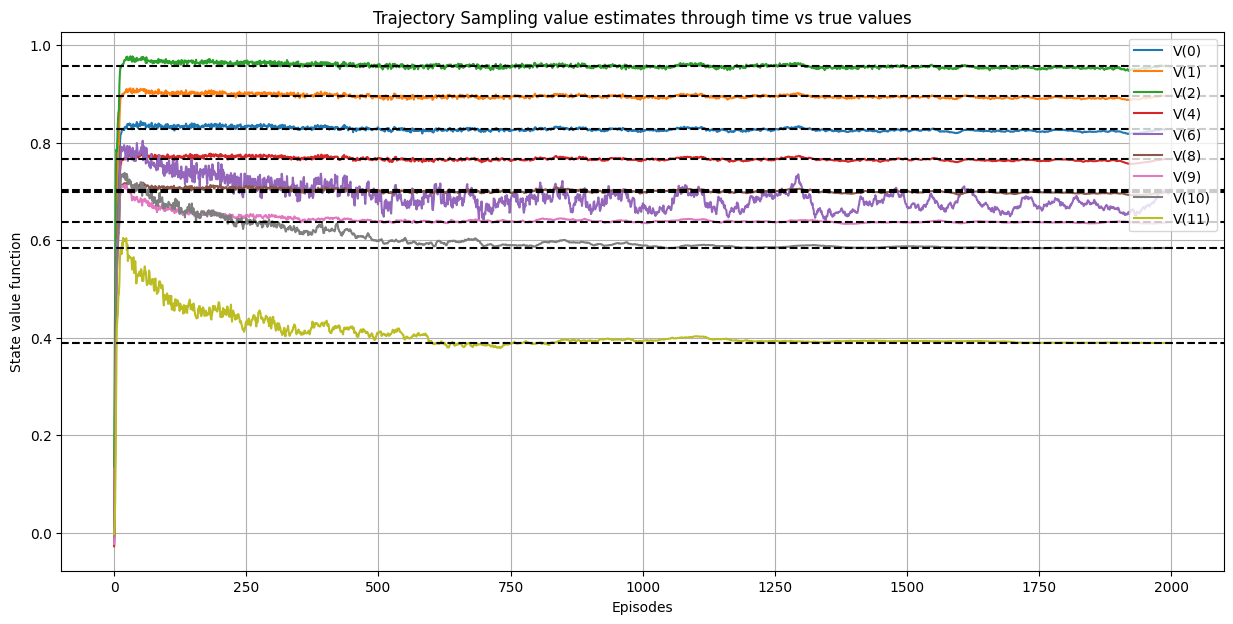

In [ ]:
seeds = list(np.arange(100, 150))
numEpisodes = 2000
maxSteps = 100
gamma = 0.99
mctype = "FVMC"
trace_decay = 0.3
decayType = "exponential"
maxTrajectory = 10

cumulative_state_values = {s : [0]*numEpisodes for s in range(12) if s not in [3,5,7]}
true_values = [0]*9
# iterating through various seeds (TD)
for seed in seeds:
  global_seed = int(seed)
  q_values, state_values, policy, q_episodes = trajectorySampling(env, gamma, decaytype, maxSteps, numEpisodes, maxTrajectory, global_seed)
  true_values = list(map(add, true_values, [state_values[numEpisodes - 1][i] for i in range(12) if i not in [3, 5, 7]]))
  for state in range(12):
    if state not in [3,5,7]:
      values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]

      # taking the cumulative sum for each state over different seeds
      cumulative_state_values[state] = list(map(add, cumulative_state_values[state], values_per_state))

avg_state_values = {state: [value / len(seeds) for value in values] for state, values in cumulative_state_values.items()}
true_values = [value / len(seeds) for value in true_values]

plt.figure(figsize=(15, 7))

# Plot the estimated values for each state
for state in range(12):  # Loop through non-terminal states
    if state not in [3,5,7]:
      plt.plot(avg_state_values[state], label=f'V({state})')

# Plot the true values for each state as horizontal lines
for state, true_value in enumerate(true_values, start=1):
    plt.axhline(y=true_value, color='k', linestyle='--')

plt.xlabel('Episodes')
plt.ylabel('State value function')
plt.title('Trajectory Sampling value estimates through time vs true values')
plt.legend(loc = "upper right")
plt.grid()
plt.show()

# Q function estimates vs Episodes

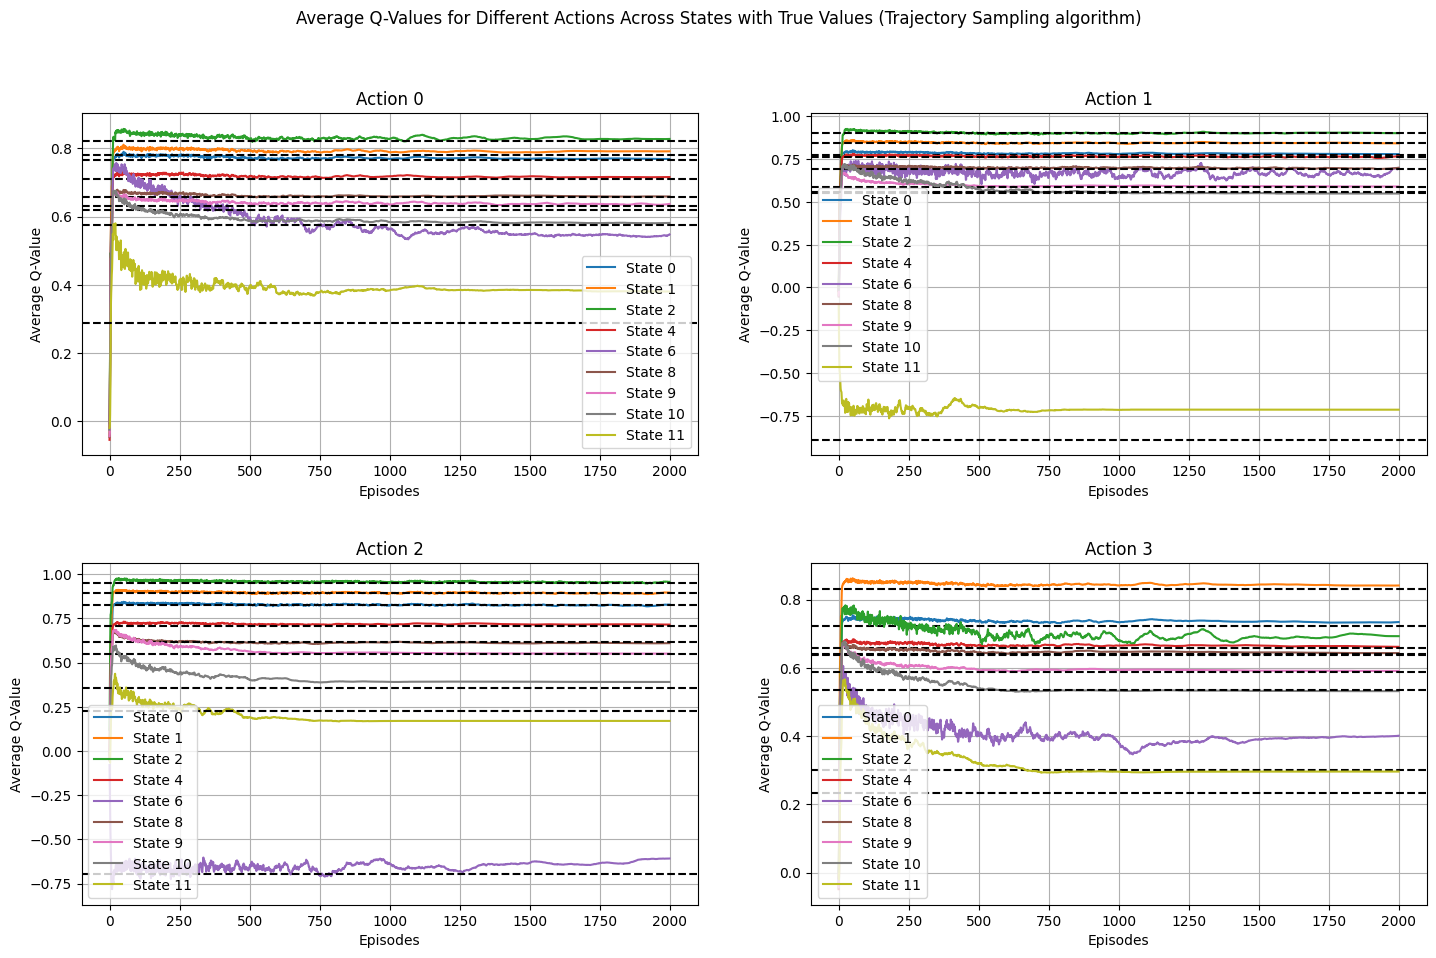

In [ ]:
numActions = 4  # Assuming 4 actions
states_to_plot = [0, 1, 2, 4, 6, 8, 9, 10, 11] # non terminal states
seeds = list(np.arange(100, 150))
numEpisodes = 2000
maxSteps = 100
gamma = 0.99
mctype = "FVMC"
trace_decay = 0.3
decayType = "exponential"
maxTrajectory = 10

# Initialize cumulative Q-values
cumulative_q_values = {state: {action: [0] * numEpisodes for action in range(numActions)} for state in states_to_plot}

# Iterate over seeds
for seed in seeds:
    global_seed = int(seed)
    _, _, _, q_values =  trajectorySampling(env, gamma, decaytype, maxSteps, numEpisodes, maxTrajectory, global_seed)

    for state in states_to_plot:
        for action in range(numActions):
            for episode in range(numEpisodes):
                cumulative_q_values[state][action][episode] += q_values[episode][state][action]

# Calculate average Q-values
avg_q_values = {state: {action: [cumulative_q_values[state][action][episode] / len(seeds) for episode in range(numEpisodes)]
                        for action in range(numActions)} for state in states_to_plot}
true_q_values = {state: {action: q_values[numEpisodes - 1][state][action] for action in range(numActions)} for state in states_to_plot}

# Plotting with true values
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for i, action in enumerate(range(numActions)):
    ax = axes[i // 2, i % 2]
    for state in states_to_plot:
        # Plot average Q-values
        ax.plot(avg_q_values[state][action], label=f'State {state}')
        # Plot true values as horizontal lines
        ax.axhline(y=true_q_values[state][action], color='k', linestyle='--')

    ax.set_title(f'Action {action}')
    ax.set_xlabel('Episodes')
    ax.set_ylabel('Average Q-Value')
    ax.legend()
    ax.grid()

plt.suptitle('Average Q-Values for Different Actions Across States with True Values (Trajectory Sampling algorithm)')
plt.tight_layout(pad=3.0)
plt.show()

# Comparison between Control Algorithms

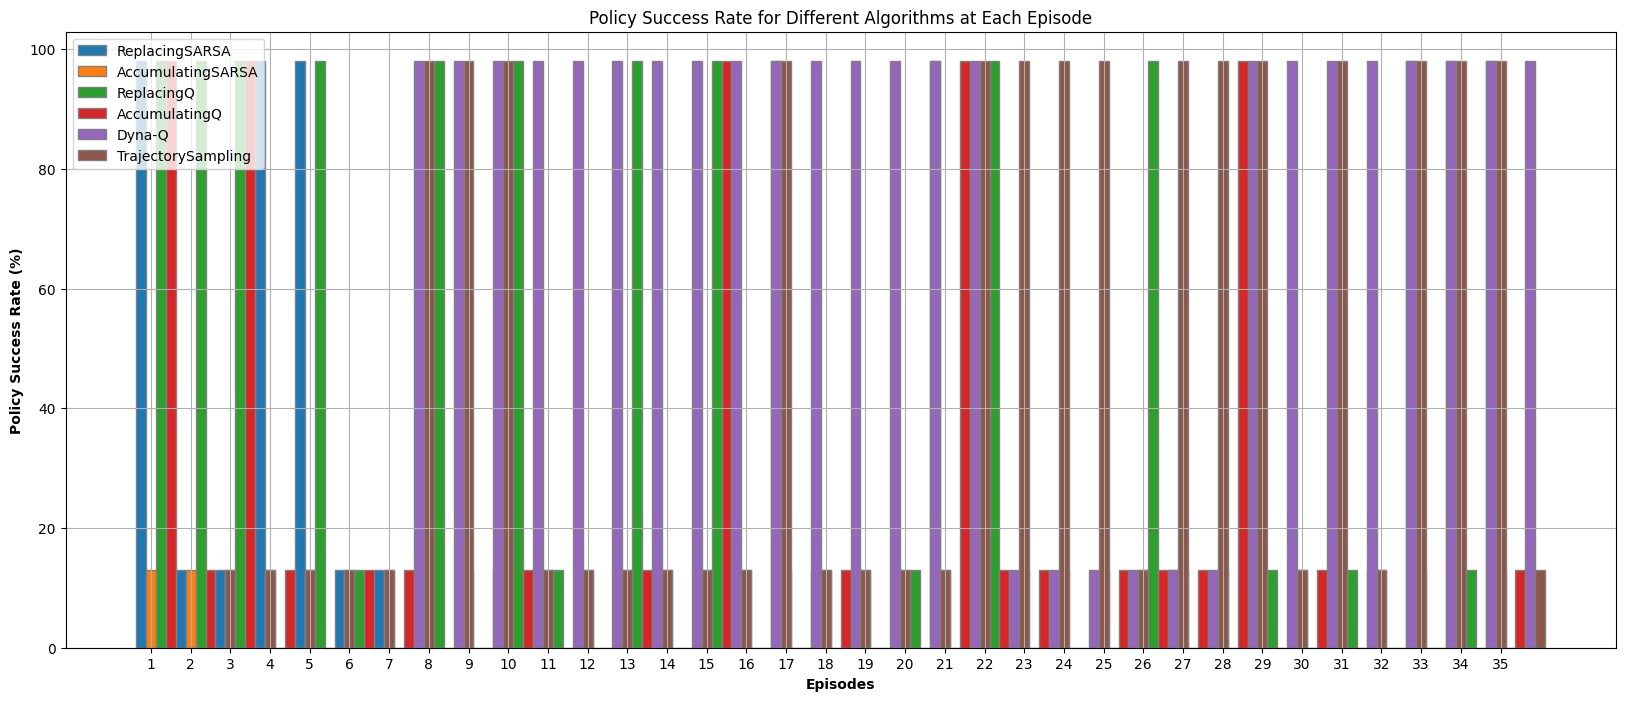

In [ ]:
numActions = 4  # Assuming 4 actions
states_to_plot = [0, 1, 2, 4, 6, 8, 9, 10, 11] # Non-terminal states
numEpisodes = 35
maxSteps = 100
numPlanning = 10
maxTrajectory = 10
trace_decay = 0.3
gamma = 0.99
mctype = "FVMC"
decayType = "exponential"
global_seed = 123

# Implementing the policy success rate calculation for all control algorithms
def getPolicySuccessRate(env, curr_policy, goalState, maxEpisodes=100, maxSteps=200, global_seed=123):
    success_count = 0
    for episode in range(maxEpisodes):
        episode_seed = global_seed + episode
        state = env.reset(seed=episode_seed)

        for _ in range(maxSteps):
            action = curr_policy[state]
            next_state, reward, done, _ = env.step(action)
            if next_state == goalState:
                success_count += 1
                break
            if done:
                break

        state = next_state

    return (success_count / maxEpisodes) * 100

goalState = 3 # Defining the goal state

# Running it for different algorithms
policy_success_rates = {
    'ReplacingSARSA': [],
    'AccumulatingSARSA': [],
    'ReplacingQ': [],
    'AccumulatingQ': [],
    'Dyna-Q': [],
    'TrajectorySampling': []
}
algorithms = [replacingSARSA, accumulatingSARSA, replacingQ, accumulatingQ, DynaQ, trajectorySampling]


# running the algorithms

for episode in range(numEpisodes):
  episode_seed = global_seed + episode

  # SARSA with Replacing traces
  q_values_replace_sarsa, _, policy_replace_sarsa, _ = replacingSARSA(env, gamma, trace_decay, decaytype, maxSteps, episode + 1, global_seed, replaceTrace=True)
  success_rate_replace_sarsa = getPolicySuccessRate(env, policy_replace_sarsa, goalState, maxEpisodes=100, maxSteps=200, global_seed=123)
  policy_success_rates['ReplacingSARSA'].append(success_rate_replace_sarsa)

  # SARSA with Accumulating traces
  q_values_accumulate_sarsa, _, policy_accumulate_sarsa, _ = accumulatingSARSA(env, gamma, trace_decay, decaytype, maxSteps, episode + 1, global_seed, replaceTrace=False)
  success_rate_accumulate_sarsa = getPolicySuccessRate(env, policy_accumulate_sarsa, goalState, maxEpisodes=100, maxSteps=200, global_seed=123)
  policy_success_rates['AccumulatingSARSA'].append(success_rate_accumulate_sarsa)

  # Q-Learning with Replacing traces
  q_values_replace_q, _, policy_replace_q, _ = replacingQ(env, gamma, trace_decay, decaytype, maxSteps, episode + 1, global_seed, replaceTrace = True)
  success_rate_replace_q = getPolicySuccessRate(env, policy_replace_q, goalState, maxEpisodes=100, maxSteps=200, global_seed=123)
  policy_success_rates['ReplacingQ'].append(success_rate_replace_q)

  # Q-Learning with Replacing traces
  q_values_accumulate_q, _, policy_accumulate_q, _ = accumulatingQ(env, gamma, trace_decay, decaytype, maxSteps, episode + 1, global_seed, replaceTrace = False)
  success_rate_accumulate_q = getPolicySuccessRate(env, policy_accumulate_q, goalState, maxEpisodes=100, maxSteps=200, global_seed=123)
  policy_success_rates['AccumulatingQ'].append(success_rate_accumulate_q)

  # Dyna - Q
  q_values_dynaq, _, policy_dynaq, _ = DynaQ(env, gamma, decaytype, maxSteps, episode + 1, numPlanning, global_seed)
  success_rate_dynaq = getPolicySuccessRate(env, policy_dynaq, goalState, maxEpisodes=100, maxSteps=200, global_seed=123)
  policy_success_rates['Dyna-Q'].append(success_rate_dynaq)

  # Trajectory Sampling
  q_values_ts, _, policy_ts, _ = trajectorySampling(env, gamma, decaytype, maxSteps, episode + 1, maxTrajectory, global_seed)
  success_rate_ts = getPolicySuccessRate(env, policy_ts, goalState, maxEpisodes=100, maxSteps=200, global_seed=123)
  policy_success_rates['TrajectorySampling'].append(success_rate_ts)


# Plotting

numAlgorithms = len(policy_success_rates)
barWidth = 0.25
r = np.arange(numEpisodes)
positions = [r + i * barWidth for i in range(numAlgorithms)]
plt.figure(figsize=(20, 8))
for pos, (algorithm, rates) in zip(positions, policy_success_rates.items()):
    plt.bar(pos, rates, width=barWidth, edgecolor='grey', label=algorithm)
plt.xlabel('Episodes', fontweight='bold')
plt.ylabel('Policy Success Rate (%)', fontweight='bold')
plt.title('Policy Success Rate for Different Algorithms at Each Episode')
plt.xticks([r + barWidth for r in range(numEpisodes)], range(1, numEpisodes + 1))
plt.legend()
plt.grid()
plt.show()


# Expected Reward from Starting state vs Episodes for all algorithms

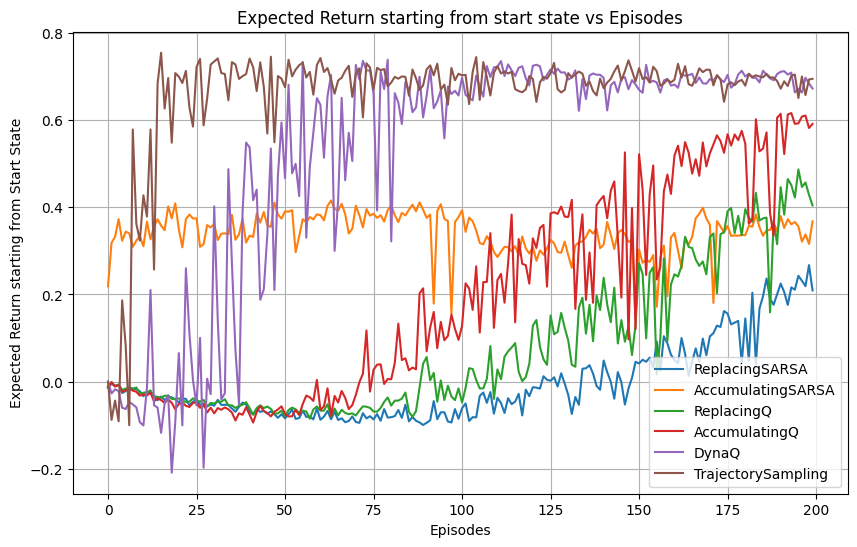

In [ ]:
start_state = 8
numEpisodes = 200
trace_decay = 0.3
numPlanning = 10
maxTrajectory = 10
decaytype = "exponential"
maxSteps = 100
global_seed = 123
gamma = 0.99

# Optimal values
optimal_v = [0.81822562, 0.87940829, 0.94003949, 0, 0.75589938, 0, 0.64962408, 0, 0.67258319, 0.47120656, 0.51587392, 0.38709683]

expected_reward = {
    'ReplacingSARSA': [],
    'AccumulatingSARSA': [],
    'ReplacingQ': [],
    'AccumulatingQ': [],
    'DynaQ': [],
    'TrajectorySampling': []
}

for episode in range(numEpisodes):
  episode_seed = global_seed + episode

  # SARSA with Replacing traces
  q_values_replace_sarsa, _, _, _ = replacingSARSA(env, gamma, trace_decay, decaytype, maxSteps, episode + 1, episode_seed, replaceTrace=True)
  best_action_replace_sarsa = np.argmax(q_values_replace_sarsa[start_state])
  expected_reward['ReplacingSARSA'].append(q_values_replace_sarsa[start_state, best_action_replace_sarsa])

  # SARSA with Accumulating traces
  q_values_accumulate_sarsa, _, _, _ = accumulatingSARSA(env, gamma, trace_decay, decaytype, maxSteps, episode + 1, episode_seed, replaceTrace=False)
  best_action_accumulate_sarsa = np.argmax(q_values_accumulate_sarsa[start_state])
  expected_reward['AccumulatingSARSA'].append(q_values_accumulate_sarsa[start_state, best_action_accumulate_sarsa])

  # Q-Learning with Replacing traces
  q_values_replace_q, _, _, _ = replacingQ(env, gamma, trace_decay, decaytype, maxSteps, episode + 1, episode_seed, replaceTrace=True)
  best_action_replace_q = np.argmax(q_values_replace_q[start_state])
  expected_reward['ReplacingQ'].append(q_values_replace_q[start_state, best_action_replace_q])

  # Q-Learning with Accumulating Traces
  q_values_accumulate_q, _, _, _ = accumulatingQ(env, gamma, trace_decay, decaytype, maxSteps, episode + 1, episode_seed, replaceTrace=False)
  best_action_accumulate_q = np.argmax(q_values_accumulate_q[start_state])
  expected_reward['AccumulatingQ'].append(q_values_accumulate_q[start_state, best_action_accumulate_q])

  # Dyna-Q
  q_values_dynaq, _, _, _ = DynaQ(env, gamma, decaytype, maxSteps, episode + 1, numPlanning, episode_seed)
  best_action_dynaq = np.argmax(q_values_dynaq[start_state])
  expected_reward['DynaQ'].append(q_values_dynaq[start_state, best_action_dynaq])

  # Trajectory Sampling
  q_values_ts, _, _, _ = trajectorySampling(env, gamma, decaytype, maxSteps, episode + 1, maxTrajectory, episode_seed)
  best_action_ts = np.argmax(q_values_ts[start_state])
  expected_reward['TrajectorySampling'].append(q_values_ts[start_state, best_action_ts])

# Plotting
plt.figure(figsize=(10, 6))
for algorithm_name, rewards in expected_reward.items():
    plt.plot(rewards, label=algorithm_name)

plt.xlabel('Episodes')
plt.ylabel('Expected Return starting from Start State')
plt.title('Expected Return starting from start state vs Episodes')
plt.legend()
plt.grid()
plt.show()

# State Estimation Error vs Episodes for all algorithms

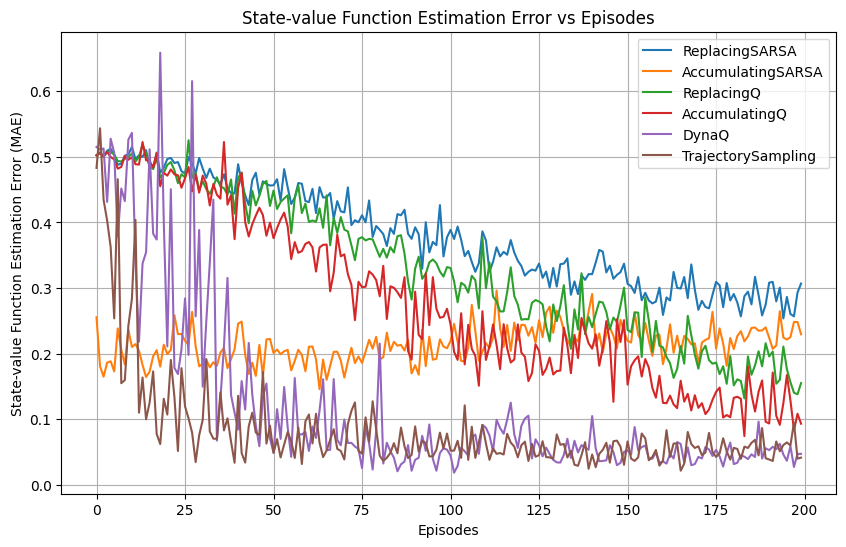

In [ ]:
# optimal values for all states
numEpisodes = 200
trace_decay = 0.3
numPlanning = 10
maxTrajectory = 10
decaytype = "exponential"
maxSteps = 100
global_seed = 123
optimal_v = [0.81822562, 0.87940829, 0.94003949, 0, 0.75589938, 0, 0.64962408, 0, 0.67258319, 0.47120656, 0.51587392, 0.38709683]

estimation_error = {
    'ReplacingSARSA': [],
    'AccumulatingSARSA': [],
    'ReplacingQ': [],
    'AccumulatingQ': [],
    'DynaQ': [],
    'TrajectorySampling': []
}

# Iterating over the episodes
for episode in range(numEpisodes):
  episode_seed = global_seed + episode

  # Replacing SARSA
  q_values_replace_sarsa, _, _, _ = replacingSARSA(env, gamma, trace_decay, decaytype, maxSteps, episode + 1, episode_seed, replaceTrace=True)
  v_replace_sarsa = np.max(q_values_replace_sarsa, axis=1)
  mae_replace_sarsa = np.mean(np.abs(v_replace_sarsa - optimal_v))
  estimation_error['ReplacingSARSA'].append(mae_replace_sarsa)

  # Accumulating SARSA
  q_values_accumulate_sarsa, _, _, _ = accumulatingSARSA(env, gamma, trace_decay, decaytype, maxSteps, episode + 1, episode_seed, replaceTrace=False)
  v_accumulate_sarsa = np.max(q_values_accumulate_sarsa, axis=1)
  mae_accumulate_sarsa = np.mean(np.abs(v_accumulate_sarsa - optimal_v))
  estimation_error['AccumulatingSARSA'].append(mae_accumulate_sarsa)

  # Replacing Q
  q_values_replace_q, _, _, _ = replacingQ(env, gamma, trace_decay, decaytype, maxSteps, episode + 1, episode_seed, replaceTrace=True)
  v_replace_q = np.max(q_values_replace_q, axis=1)
  mae_replace_q = np.mean(np.abs(v_replace_q - optimal_v))
  estimation_error['ReplacingQ'].append(mae_replace_q)

  # Accumulating Q
  q_values_accumulate_q, _, _, _ = accumulatingQ(env, gamma, trace_decay, decaytype, maxSteps, episode + 1, episode_seed, replaceTrace=False)
  v_accumulate_q = np.max(q_values_accumulate_q, axis=1)
  mae_accumulate_q = np.mean(np.abs(v_accumulate_q - optimal_v))
  estimation_error['AccumulatingQ'].append(mae_accumulate_q)

  # Dyna-Q
  q_values_dynaq, _, _, _ = DynaQ(env, gamma, decaytype, maxSteps, episode + 1, numPlanning, episode_seed)
  v_dynaq = np.max(q_values_dynaq, axis=1)
  mae_dynaq = np.mean(np.abs(v_dynaq - optimal_v))
  estimation_error['DynaQ'].append(mae_dynaq)

  # Trajectory Sampling
  q_values_ts, _, _, _ = trajectorySampling(env, gamma, decaytype, maxSteps, episode + 1, maxTrajectory, episode_seed)
  v_ts = np.max(q_values_ts, axis=1)
  mae_ts = np.mean(np.abs(v_ts - optimal_v))
  estimation_error['TrajectorySampling'].append(mae_ts)

# Plotting the results
plt.figure(figsize=(10, 6))
for algorithm_name, errors in estimation_error.items():
    plt.plot(errors, label=algorithm_name)

plt.xlabel('Episodes')
plt.ylabel('State-value Function Estimation Error (MAE)')
plt.title('State-value Function Estimation Error vs Episodes')
plt.legend()
plt.grid()
plt.show()